<a href="https://colab.research.google.com/github/shofwatunniswah/TimeseriesForecasting/blob/main/Final_Project_PAP_Kelompok_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings('ignore')

In [ ]:
# connect drive ke google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# memuat data set
df = pd.read_csv('/content/drive/MyDrive/PAP/dataset_penumpang_new.csv')
print(df.head())

   Tahun  Bulan  Periode  Jumlah
0   2018      1        1      33
1   2018      2        2     238
2   2018      3        3    1391
3   2018      4        4    1883
4   2018      5        5    2752


#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Tahun    72 non-null     int64
 1   Bulan    72 non-null     int64
 2   Periode  72 non-null     int64
 3   Jumlah   72 non-null     int64
dtypes: int64(4)
memory usage: 2.4 KB


In [ ]:
df.describe()

Tahun      Bulan   Periode        Jumlah
count    72.00000  72.000000  72.00000     72.000000
mean   2020.50000   6.500000  36.50000  26493.152778
std       1.71981   3.476278  20.92845  16354.212223
min    2018.00000   1.000000   1.00000     33.000000
25%    2019.00000   3.750000  18.75000  16415.250000
50%    2020.50000   6.500000  36.50000  25771.500000
75%    2022.00000   9.250000  54.25000  38119.500000
max    2023.00000  12.000000  72.00000  67743.000000

In [ ]:
df['Jumlah'].isnull().sum()

0

<Axes: >

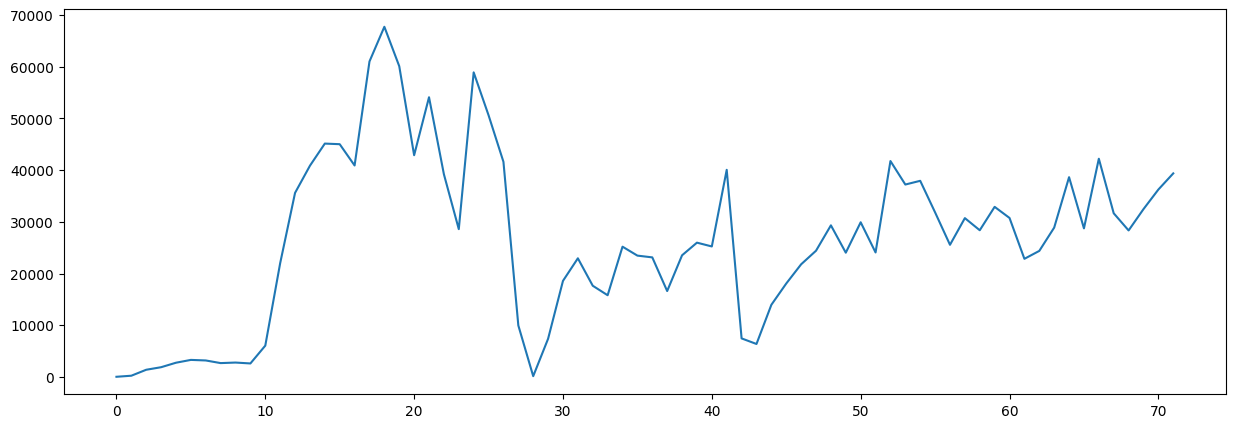

In [ ]:
df['Jumlah'].plot(figsize=(15,5))

In [ ]:
# Membuat kolom date dengan hanya tahun dan bulan
df['date'] = pd.to_datetime(df['Tahun'].astype(str) + '-' + df['Bulan'].astype(str))

# Assuming the correct column name is 'Jumlah'

# Membuat DataFrame baru dengan kolom date dan data jumlah penumpang
new_df = df[['date', 'Jumlah']].copy() # Changed the column name here

# Menampilkan info
new_df.info()
print(new_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    72 non-null     datetime64[ns]
 1   Jumlah  72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB
date      datetime64[ns]
Jumlah             int64
dtype: object


In [ ]:
print(new_df.duplicated().sum())
new_df.drop_duplicates(subset='date', inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.sort_values(by='date')

0


date  Jumlah
0  2018-01-01      33
1  2018-02-01     238
2  2018-03-01    1391
3  2018-04-01    1883
4  2018-05-01    2752
..        ...     ...
67 2023-08-01   31662
68 2023-09-01   28342
69 2023-10-01   32468
70 2023-11-01   36256
71 2023-12-01   39381

[72 rows x 2 columns]

In [ ]:
new_df["zscore_val"] = stats.zscore(new_df['Jumlah'])
median_value = new_df['Jumlah'].median()

threshold = 3
outliers = new_df[(new_df['zscore_val'] > threshold) | (new_df['zscore_val'] < -threshold)]
new_df.loc[outliers.index, 'Jumlah'] = median_value

new_df.drop(columns=['zscore_val'], inplace=True)

In [ ]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.set_index('date', inplace=True)

In [ ]:
new_df.sort_index(inplace=True)

<Axes: xlabel='date'>

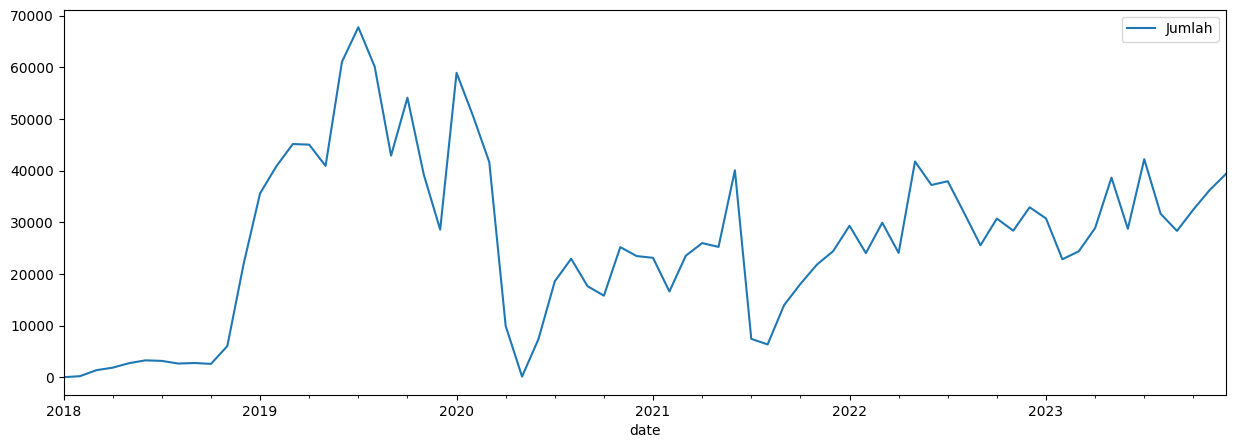

In [ ]:
new_df.plot(figsize=(15,5))

In [ ]:
new_df.describe()

Jumlah
count     72.000000
mean   26493.152778
std    16354.212223
min       33.000000
25%    16415.250000
50%    25771.500000
75%    38119.500000
max    67743.000000

#Exploratory Data Analysis

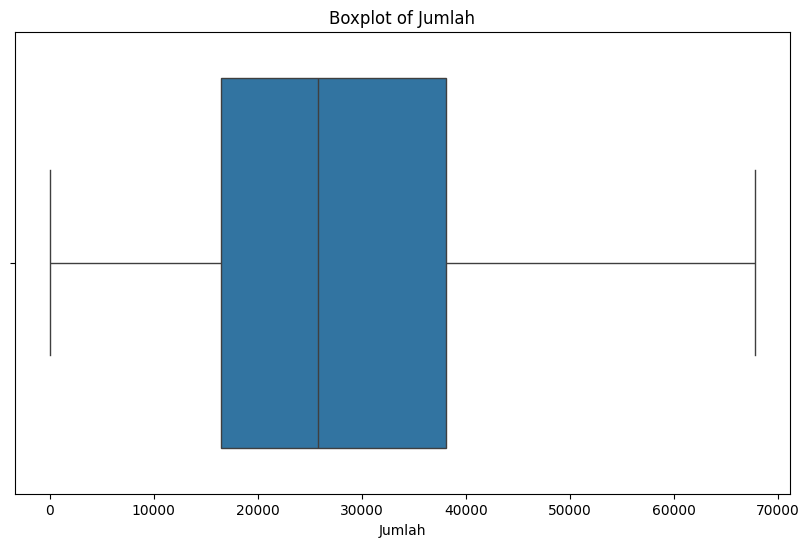

In [ ]:
# Assuming 'new_df' is your DataFrame with a 'Jumlah' column and a DateTimeIndex
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_df['Jumlah'])
plt.title('Boxplot of Jumlah')
plt.show()

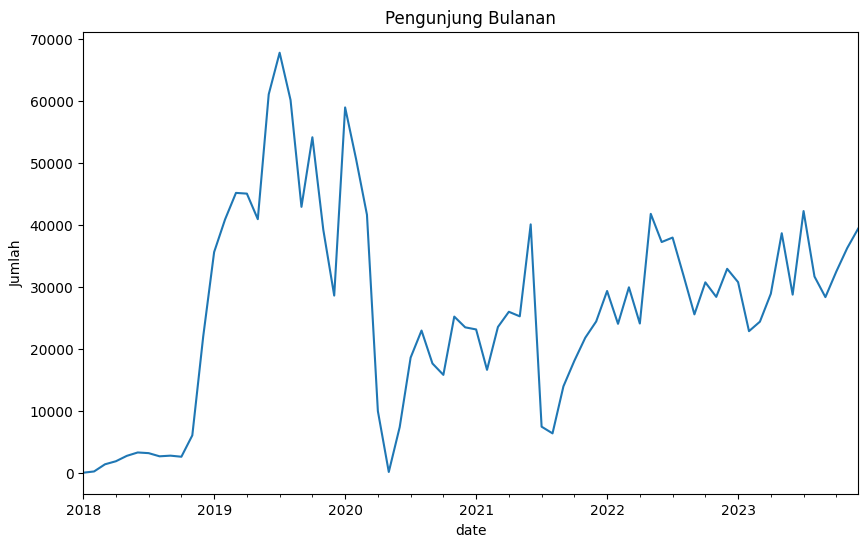

In [ ]:
# Menghitung rata-rata pengunjung bulanan
monthly_avg = new_df['Jumlah'].resample('M').mean()

# Visualisasi rata-rata bulanan
monthly_avg.plot(figsize=(10, 6), title='Pengunjung Bulanan')
plt.ylabel('Jumlah')
plt.show()

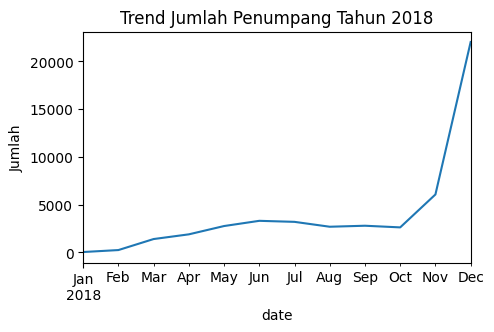

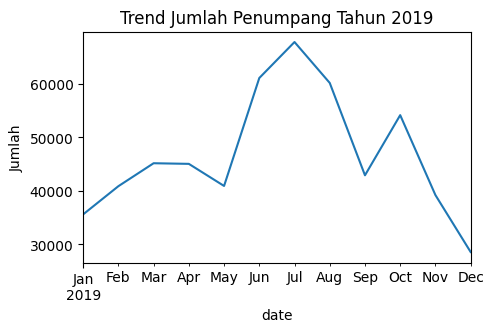

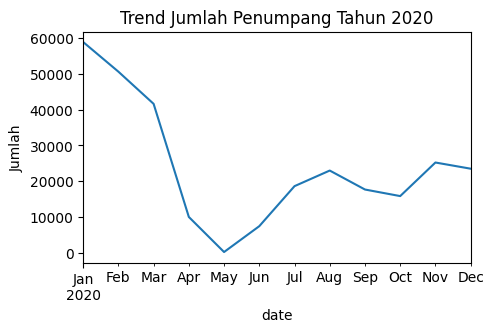

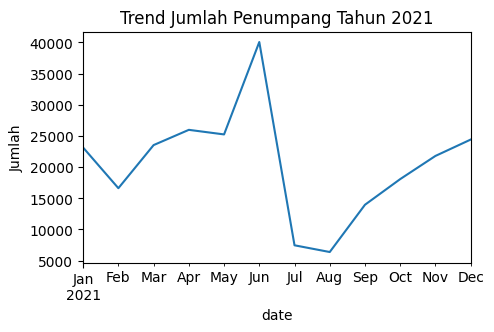

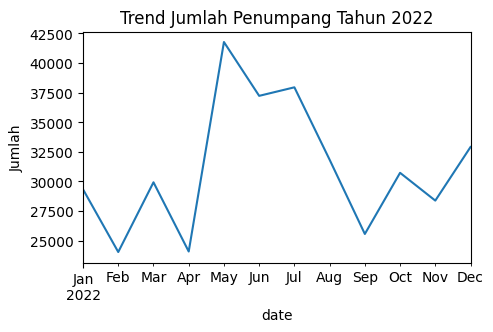

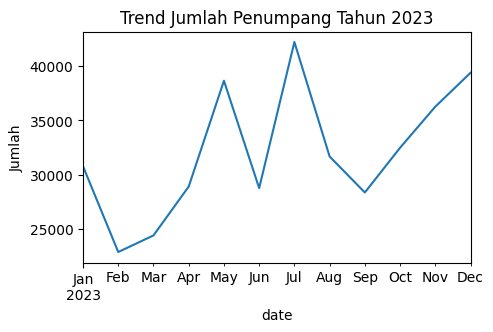

In [ ]:


# Filter data for the year 2018
df_2018 = new_df.loc['2018-01-01':'2018-12-31']
df_2019 = new_df.loc['2019-01-01':'2019-12-31']
df_2020 = new_df.loc['2020-01-01':'2020-12-31']
df_2021 = new_df.loc['2021-01-01':'2021-12-31']
df_2022 = new_df.loc['2022-01-01':'2022-12-31']
df_2023 = new_df.loc['2023-01-01':'2023-12-31']

# Plot the trend for 2018 in a separate plot
plt.figure(figsize=(5, 3))
df_2018['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2018')
plt.ylabel('Jumlah')
plt.show()

# Plot the trend for 2019 in a separate plot
plt.figure(figsize=(5, 3))
df_2019['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2019')
plt.ylabel('Jumlah')
plt.show()

# Plot the trend for 2020 in a separate plot
plt.figure(figsize=(5, 3))
df_2020['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2020')
plt.ylabel('Jumlah')
plt.show()

# Plot the trend for 2021 in a separate plot
plt.figure(figsize=(5, 3))
df_2021['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2021')
plt.ylabel('Jumlah')
plt.show()

# Plot the trend for 2022 in a separate plot
plt.figure(figsize=(5, 3))
df_2022['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2022')
plt.ylabel('Jumlah')
plt.show()

# Plot the trend for 2023 in a separate plot
plt.figure(figsize=(5, 3))
df_2023['Jumlah'].plot(title='Trend Jumlah Penumpang Tahun 2023')
plt.ylabel('Jumlah')
plt.show()

data memiliki pola kenaikan pada pertengahan tahun, kecuali pada 2018 (asumsi awal bandara dibuka) dan 2020 (pengaruh covid)

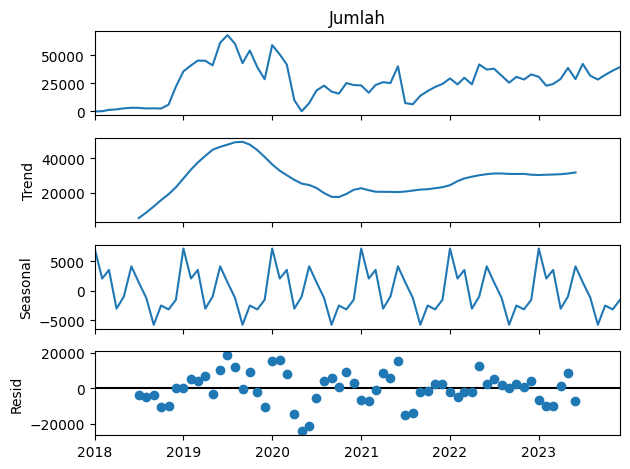

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(new_df['Jumlah'], model='additive', period=12)
result.plot()
plt.show()

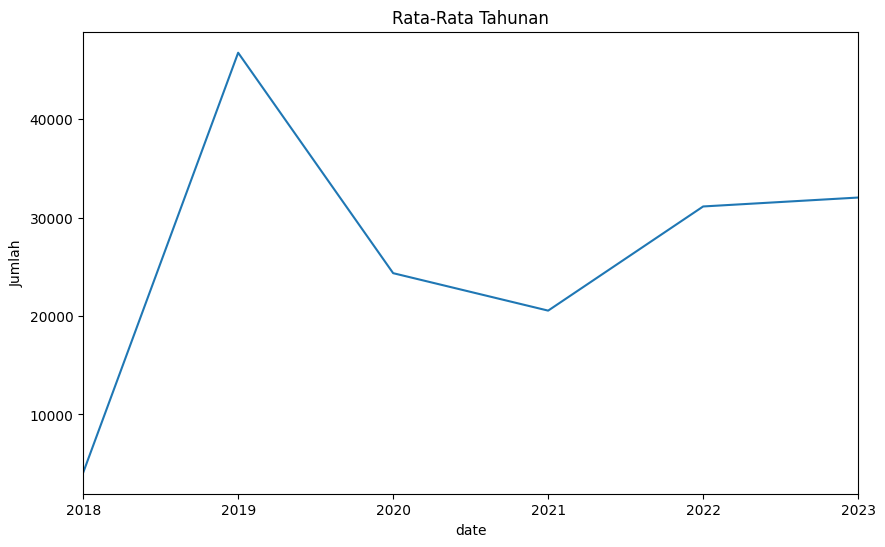

In [ ]:
# Menghitung rata-rata penumpang tahunan
yearly_avg = new_df['Jumlah'].resample('Y').mean()

# Visualisasi rata-rata tahunan
yearly_avg.plot(figsize=(10, 6), title='Rata-Rata Tahunan')
plt.ylabel('Jumlah')
plt.show()


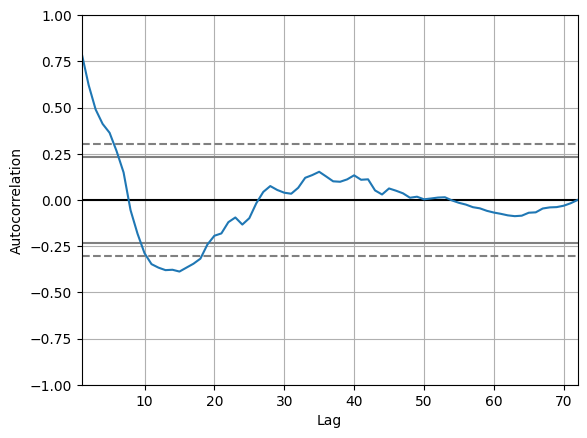

In [ ]:
from pandas.plotting import autocorrelation_plot

# Plot autokorelasi
autocorrelation_plot(new_df['Jumlah'])
plt.show()

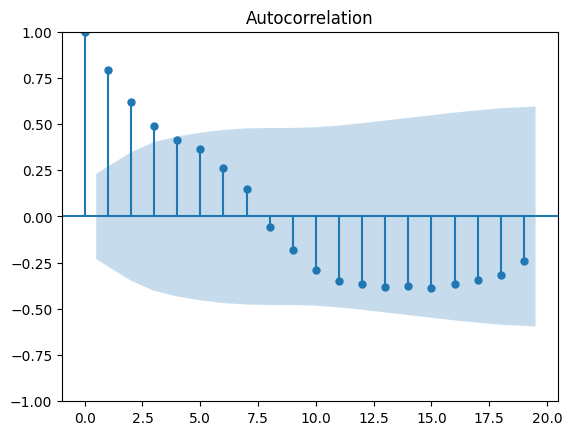

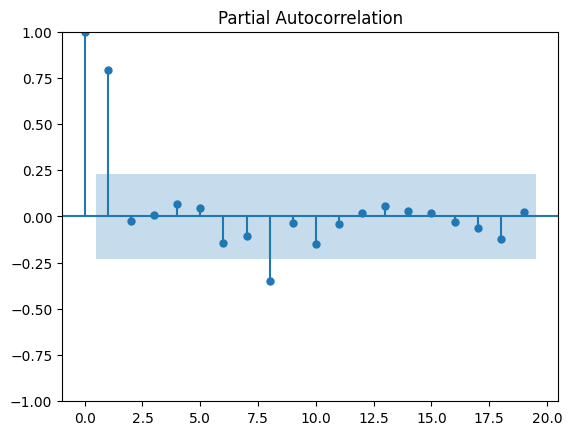

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plot_acf(new_df['Jumlah'])
plot_pacf(new_df['Jumlah'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used', 'Critical Values']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

In [ ]:
adfuller_test(new_df['Jumlah'])

ADF Test Statistic : -2.876803041478861
p-value : 0.04811274974114498
#Lags Used : 0
Number of Observations Used : 71
Critical Values : {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}


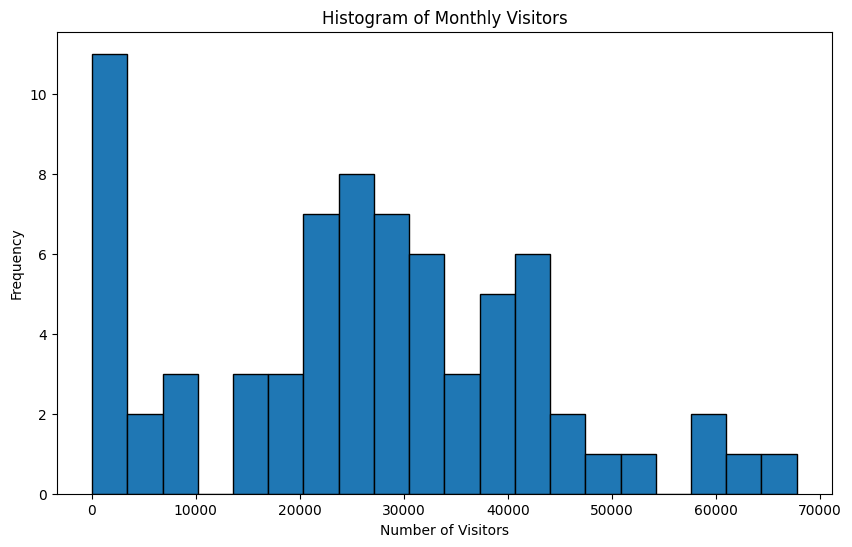

In [ ]:
# prompt: buatkan histogram dari pengunjung bulanan

# Assuming 'new_df' is your DataFrame with a 'Jumlah' column and a DateTimeIndex

plt.figure(figsize=(10, 6))
plt.hist(new_df['Jumlah'], bins=20, edgecolor='black')  # Adjust 'bins' as needed
plt.title('Histogram of Monthly Visitors')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()

##Differencing Data

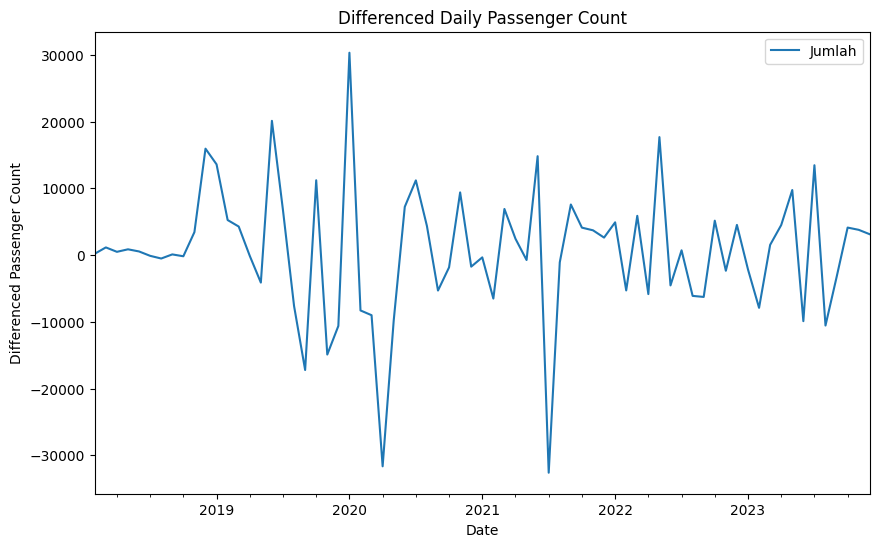

In [ ]:
new_df_diff = new_df.diff().dropna()
new_df_diff.plot(figsize=(10, 6))
plt.title('Differenced Daily Passenger Count')
plt.xlabel('Date')
plt.ylabel('Differenced Passenger Count')
plt.show()

Frekuensi Dominan: 0.36619718309859156
Amplitudo pada Frekuensi Dominan: [31655.]


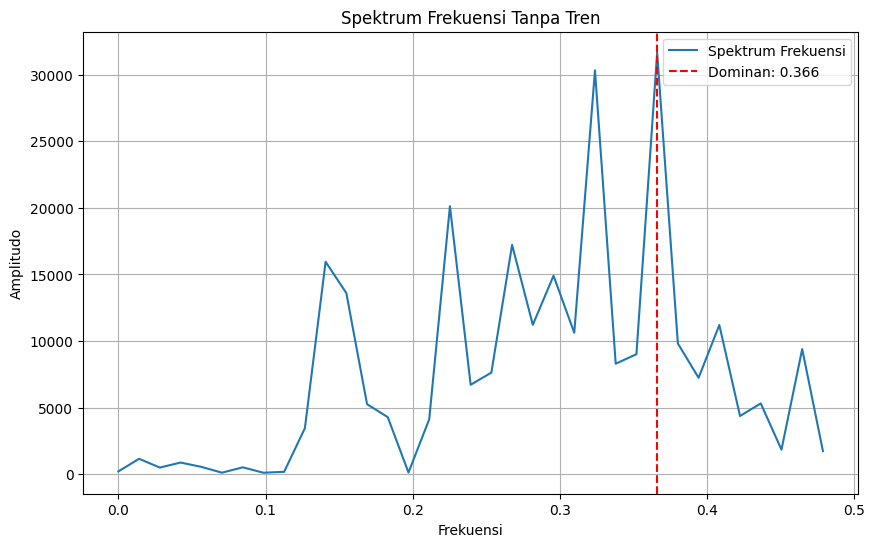

In [ ]:
fft_result = np.fft.fft(new_df_diff)
fft_magnitude = np.abs(fft_result)
fft_frequencies = np.fft.fftfreq(len(new_df_diff), d=1)

# Gunakan hanya frekuensi positif
positive_frequencies = fft_frequencies[:len(new_df_diff)//2]
positive_magnitude = fft_magnitude[:len(new_df_diff)//2]

# Temukan frekuensi dengan amplitudo tertinggi (tanpa frekuensi 0.0)
peak_index = np.argmax(positive_magnitude[1:]) + 1  # Abaikan indeks 0
dominant_frequency = positive_frequencies[peak_index]
dominant_amplitude = positive_magnitude[peak_index]

# Tampilkan hasil
print(f"Frekuensi Dominan: {dominant_frequency}")
print(f"Amplitudo pada Frekuensi Dominan: {dominant_amplitude}")

# Plot spektrum
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_magnitude, label="Spektrum Frekuensi")
plt.axvline(dominant_frequency, color='r', linestyle='--', label=f"Dominan: {dominant_frequency:.3f}")
plt.title("Spektrum Frekuensi Tanpa Tren")
plt.xlabel("Frekuensi")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid()
plt.show()

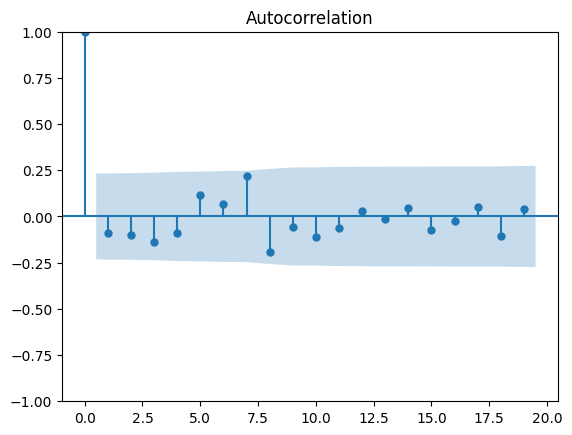

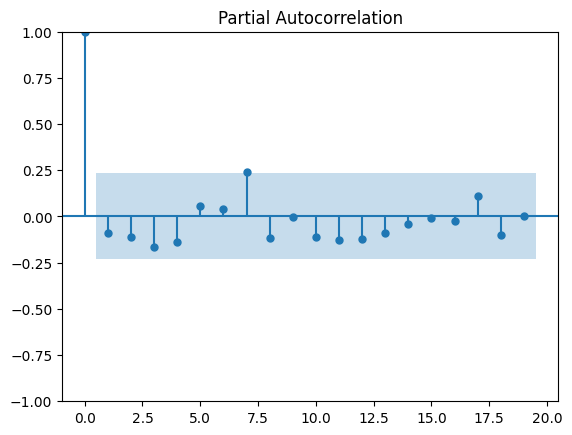

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plot_acf(new_df_diff['Jumlah'])
plot_pacf(new_df_diff['Jumlah'])
plt.show()

In [ ]:
adfuller_test(new_df_diff['Jumlah'])

ADF Test Statistic : -9.01126556233774
p-value : 6.116740405330631e-15
#Lags Used : 0
Number of Observations Used : 70
Critical Values : {'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}


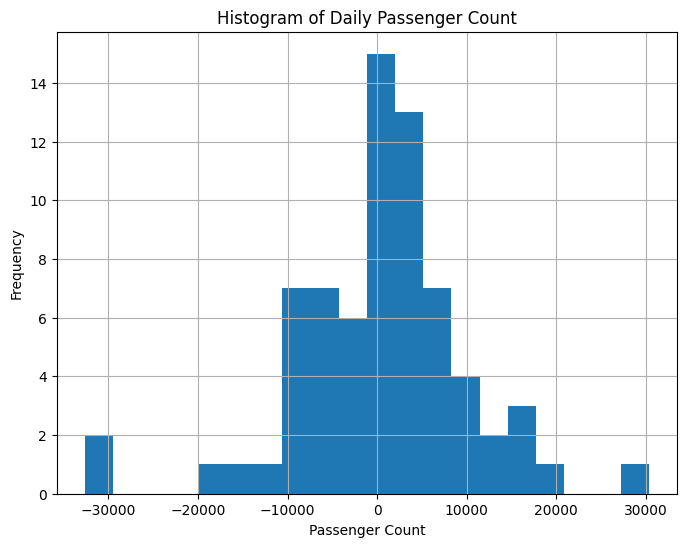

In [ ]:
new_df_diff['Jumlah'].hist(bins=20, figsize=(8, 6))
plt.title('Histogram of Daily Passenger Count') # Updated title for clarity
plt.xlabel('Passenger Count') # Updated xlabel for clarity
plt.ylabel('Frequency')
plt.show()

#Modelling

##1. Manual SARIMA

### SARIMA 80% Split

In [ ]:
df_sarima = new_df.copy()
df_sarima.head()

Jumlah
date              
2018-01-01      33
2018-02-01     238
2018-03-01    1391
2018-04-01    1883
2018-05-01    2752

In [ ]:
train_size = int(len(df_sarima) * 0.8)
train_data = df_sarima[:train_size]
test_data = df_sarima[train_size:]

<Axes: xlabel='date'>

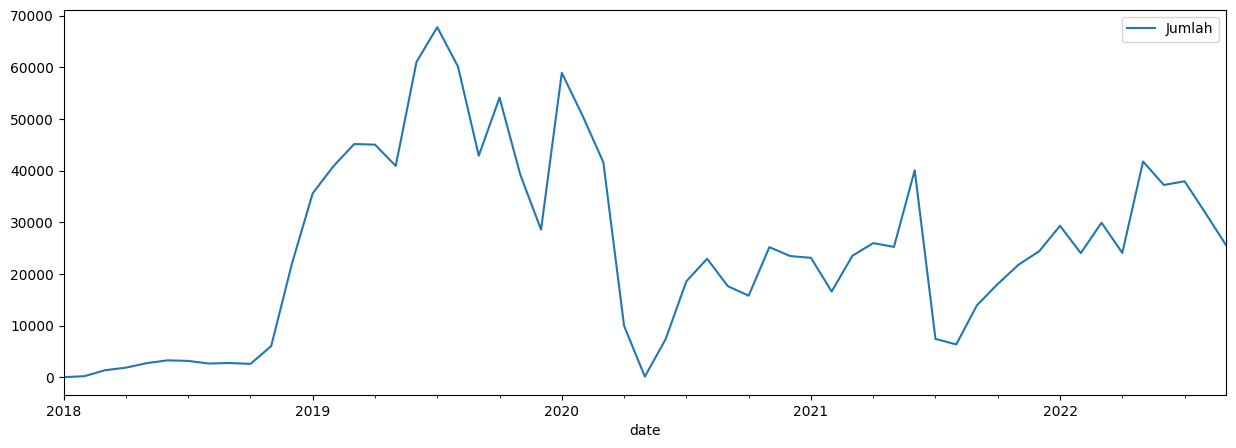

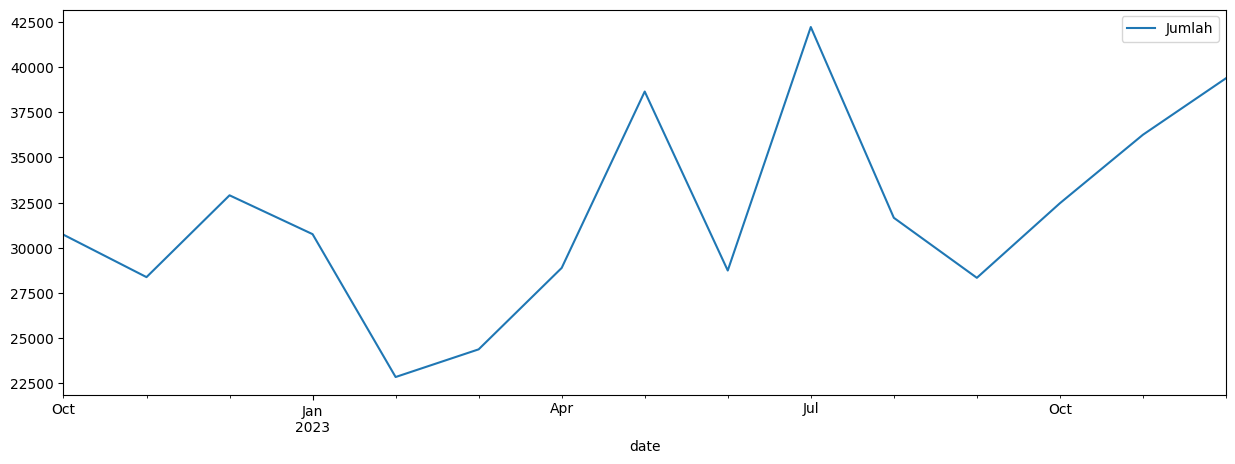

In [ ]:
train_data.plot(figsize=(15,5))
test_data.plot(figsize=(15,5))

In [ ]:
adfuller_test(train_data['Jumlah'])

ADF Test Statistic : -2.5227573292515126
p-value : 0.1100349461893812
#Lags Used : 0
Number of Observations Used : 56
Critical Values : {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definisikan parameter musiman (contoh: P=1, D=1, Q=1, m=12 untuk data musiman tahunan)
seasonal_order = (1, 0, 1, 12)  # Sesuaikan dengan periodisitas data Anda

# Buat model SARIMA
sarima_model = SARIMAX(train_data,
                       order=(4, 1, 1),  # p, d, q dari komponen non-musiman
                       seasonal_order=seasonal_order)  # P, D, Q, m dari komponen musiman

# Fit model SARIMA
sarima_model_fit = sarima_model.fit()

# Tampilkan ringkasan hasil model
print(sarima_model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   57
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -595.273
Date:                            Mon, 23 Dec 2024   AIC                           1206.547
Time:                                    04:49:11   BIC                           1222.750
Sample:                                01-01-2018   HQIC                          1212.829
                                     - 09-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9560      0.195     -4.909      0.000      -1.338      -0.574
ar.L2         -0.2341      0.240   

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definisikan parameter musiman (contoh: P=1, D=1, Q=1, m=12 untuk data musiman tahunan)
seasonal_order = (1, 0, 1, 12)  # Sesuaikan dengan periodisitas data Anda

# Buat model SARIMA
sarima_model = SARIMAX(train_data,
                       order=(4, 1, 1),  # p, d, q dari komponen non-musiman
                       seasonal_order=seasonal_order)  # P, D, Q, m dari komponen musiman

# Fit model SARIMA
sarima_model_fit = sarima_model.fit()

# Tampilkan ringkasan hasil model
print(sarima_model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   57
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -595.273
Date:                            Mon, 23 Dec 2024   AIC                           1206.547
Time:                                    04:49:16   BIC                           1222.750
Sample:                                01-01-2018   HQIC                          1212.829
                                     - 09-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9560      0.195     -4.909      0.000      -1.338      -0.574
ar.L2         -0.2341      0.240   

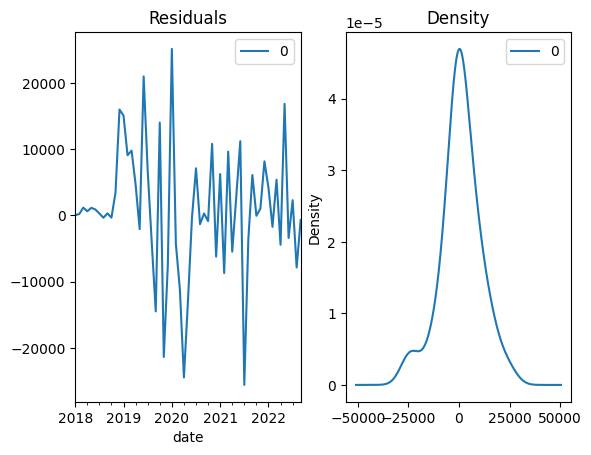

In [ ]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(sarima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

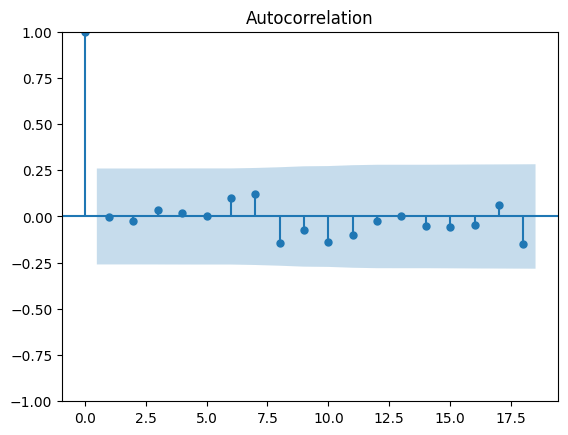

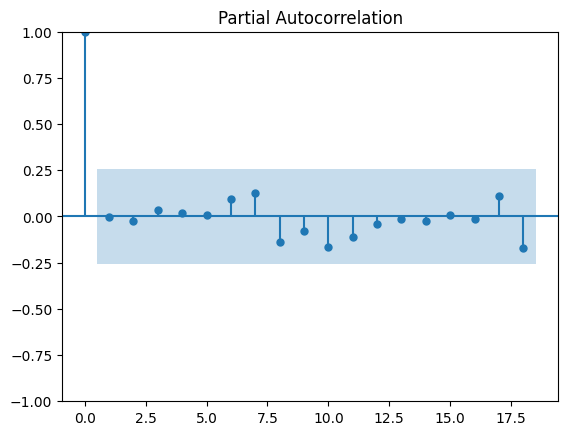

In [ ]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

In [ ]:
forecast_test = sarima_model_fit.forecast(len(test_data))

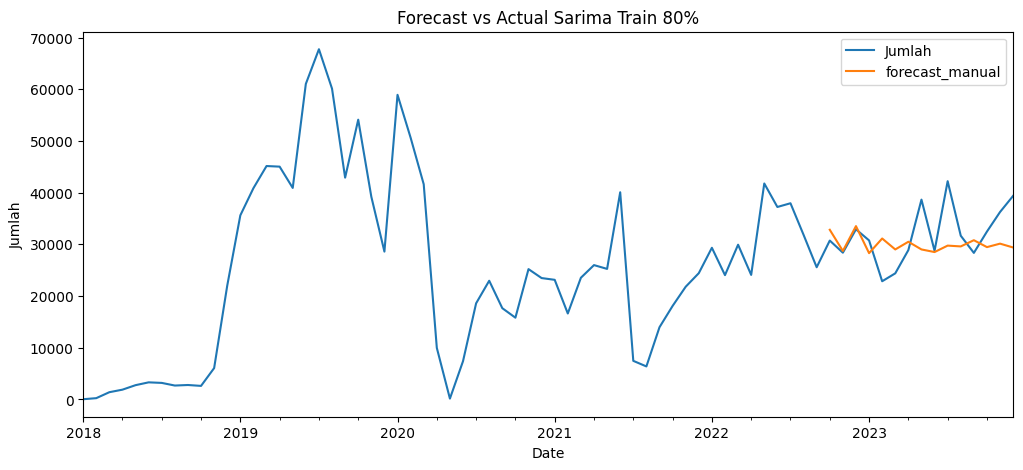

In [ ]:
df_sarima['forecast_manual'] = [None]*len(train_data) + list(forecast_test)
df_sarima.plot(figsize = (12, 5))
plt.title('Forecast vs Actual Sarima Train 80%')
plt.xlabel('Date')
plt.ylabel('Jumlah')
plt.show()

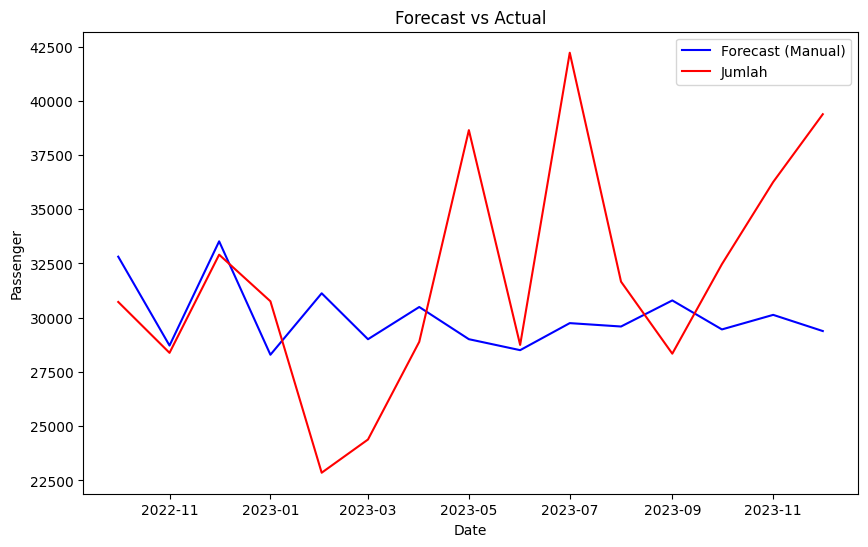

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_sarima.index, df_sarima['forecast_manual'], label='Forecast (Manual)', color='blue')
plt.plot(test_data.index, test_data['Jumlah'], label='Jumlah', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import r2_score here

# Calculate MAE
mae_a80 = mean_absolute_error(test_data['Jumlah'], forecast_test)
print(f'MAE: {mae_a80}')

# Calculate MAPE
mape_a80 = np.mean(np.abs((test_data['Jumlah'] - forecast_test) / test_data['Jumlah'])) * 100
print(f'MAPE: {mape_a80}')

# Calculate RMSE
rmse_a80 = np.sqrt(mean_squared_error(test_data['Jumlah'], forecast_test))
print(f'RMSE: {rmse_a80}')

# Calculate R-squared
r2_a80 = r2_score(test_data['Jumlah'], forecast_test)
print(f'R-squared: {r2_a80}')

MAE: 4399.79353443193
MAPE: 13.373395217886067
RMSE: 5821.6742995383465
R-squared: -0.2307571565745299


### SARIMA 70% Split

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df_sarima) * 0.7)
train_data = df_sarima[:train_size]
test_data = df_sarima[train_size:]

adfuller_test(train_data['Jumlah'])

ADF Test Statistic : -2.3018869675210953
p-value : 0.17136010917599603
#Lags Used : 0
Number of Observations Used : 49
Critical Values : {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}


In [ ]:
# Buat model SARIMA
sarima_model = SARIMAX(train_data['Jumlah'], # Select the 'Jumlah' column as endog
                       order=(4, 1, 1),  # p, d, q dari komponen non-musiman
                       seasonal_order=seasonal_order)  # P, D, Q, m dari komponen musiman

# Fit model SARIMA
sarima_model_fit = sarima_model.fit()

# Tampilkan ringkasan hasil model
print(sarima_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   50
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -522.045
Date:                            Mon, 23 Dec 2024   AIC                           1060.090
Time:                                    04:49:21   BIC                           1075.224
Sample:                                01-01-2018   HQIC                          1065.832
                                     - 02-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9128      0.188     -4.866      0.000      -1.280      -0.545
ar.L2         -0.2296      0.272   

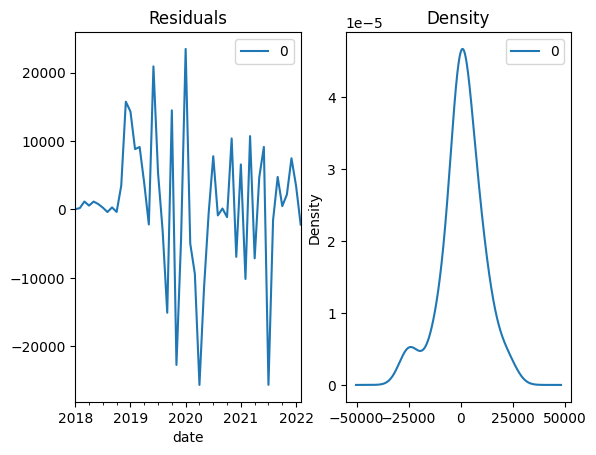

In [ ]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(sarima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

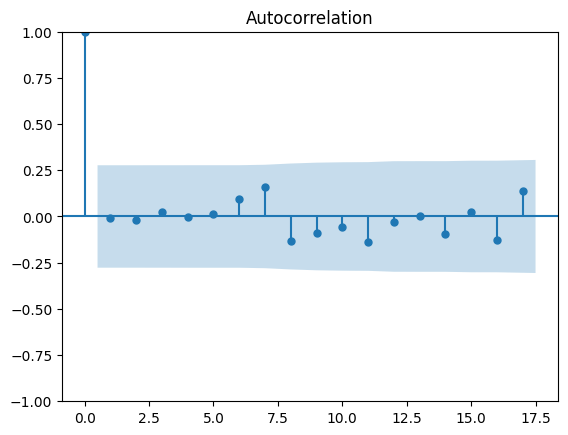

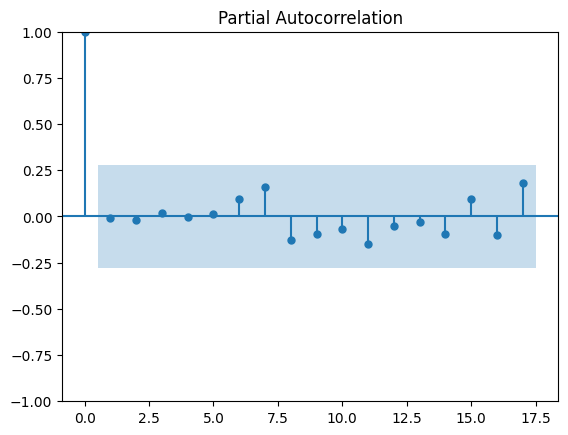

In [ ]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

In [ ]:
forecast_test = sarima_model_fit.forecast(len(test_data))

<Axes: xlabel='date'>

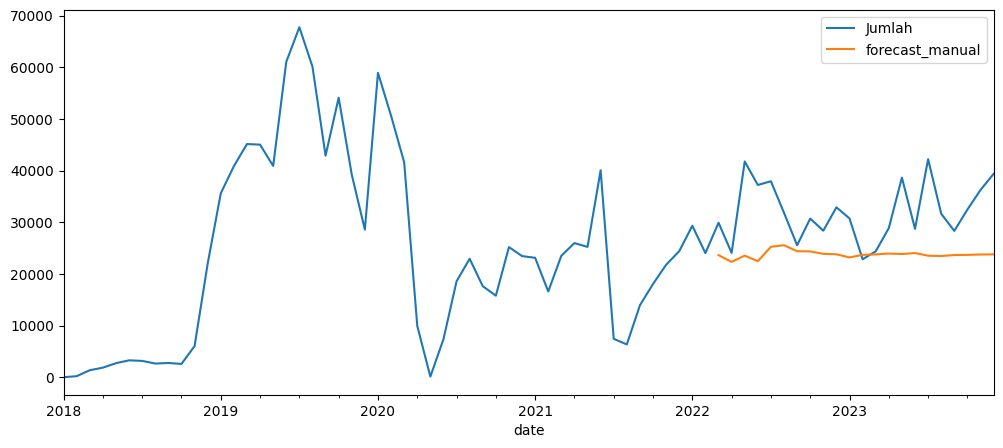

In [ ]:
df_sarima['forecast_manual'] = [None]*len(train_data) + list(forecast_test)
df_sarima.plot(figsize = (12, 5))

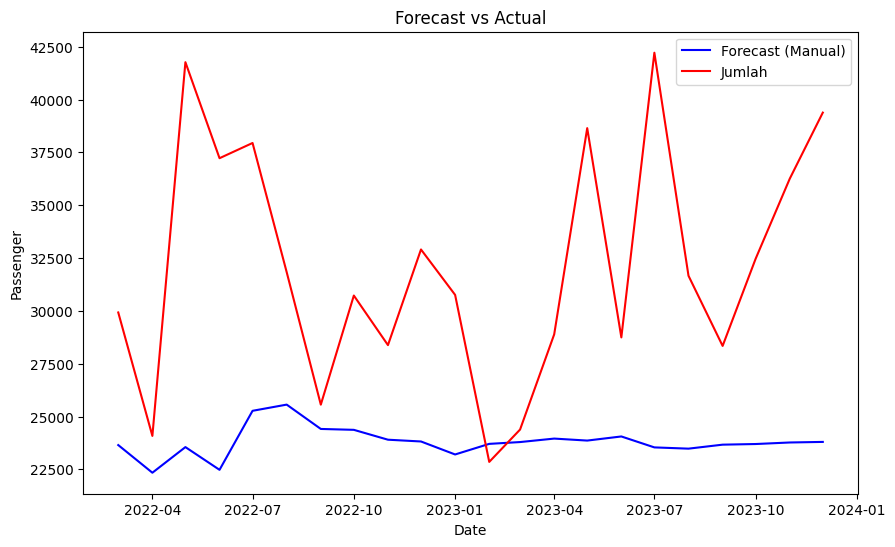

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_sarima.index, df_sarima['forecast_manual'], label='Forecast (Manual)', color='blue')
plt.plot(test_data.index, test_data['Jumlah'], label='Jumlah', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [ ]:
# prompt: buatkan saya mae mape dan rmse untuk hasil forecast diatas

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import r2_score here

# Calculate MAE
mae_a70 = mean_absolute_error(test_data['Jumlah'], forecast_test)
print(f'MAE_a70: {mae_a70}')

# Calculate MAPE
mape_a70 = np.mean(np.abs((test_data['Jumlah'] - forecast_test) / test_data['Jumlah'])) * 100
print(f'MAPE_a70: {mape_a70}')

# Calculate RMSE
rmse_a70 = np.sqrt(mean_squared_error(test_data['Jumlah'], forecast_test))
print(f'RMSE_a70: {rmse_a70}')

# Calculate R-squared
r2_a70 = r2_score(test_data['Jumlah'], forecast_test)
print(f'R-squared: {r2_a70}')

MAE_a70: 8306.106864553425
MAPE_a70: 23.77065472373145
RMSE_a70: 9935.086297142334
R-squared: -2.1921672512485317


### SARIMA 60% Split

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df_sarima) * 0.6)
train_data = df_sarima[:train_size]
test_data = df_sarima[train_size:]

adfuller_test(train_data['Jumlah'])

ADF Test Statistic : -2.0541130223403403
p-value : 0.2633615245616846
#Lags Used : 0
Number of Observations Used : 42
Critical Values : {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}


In [ ]:
# Buat model SARIMA
sarima_model = SARIMAX(train_data['Jumlah'], # Select the 'Jumlah' column as endog
                       order=(4, 1, 1),  # p, d, q dari komponen non-musiman
                       seasonal_order=seasonal_order)  # P, D, Q, m dari komponen musiman

# Fit model SARIMA
sarima_model_fit = sarima_model.fit()

# Tampilkan ringkasan hasil model
print(sarima_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   43
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -450.428
Date:                            Mon, 23 Dec 2024   AIC                            916.855
Time:                                    04:49:24   BIC                            930.757
Sample:                                01-01-2018   HQIC                           921.951
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9318      0.219     -4.254      0.000      -1.361      -0.502
ar.L2         -0.2256      0.337   

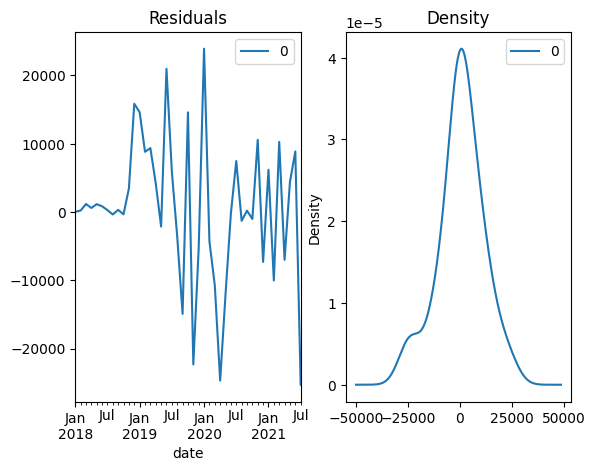

In [ ]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(sarima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

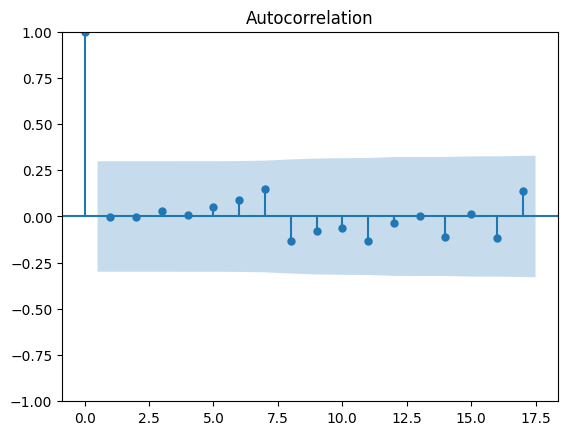

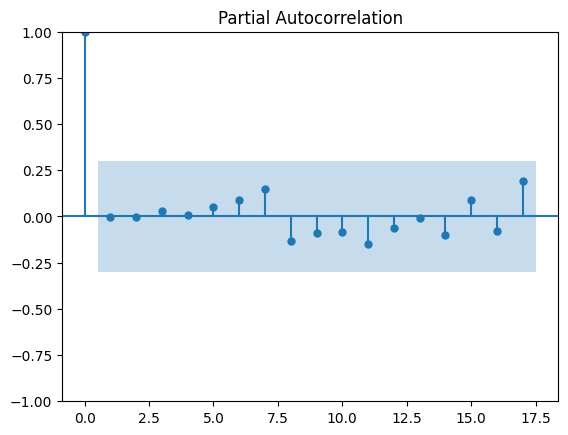

In [ ]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

<Axes: xlabel='date'>

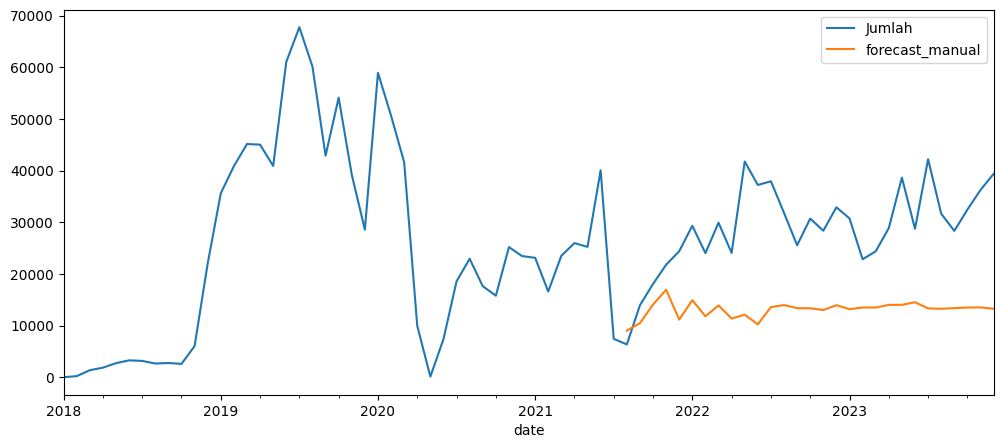

In [ ]:
forecast_test = sarima_model_fit.forecast(len(test_data))
df_sarima['forecast_manual'] = [None]*len(train_data) + list(forecast_test)
df_sarima.plot(figsize = (12, 5))

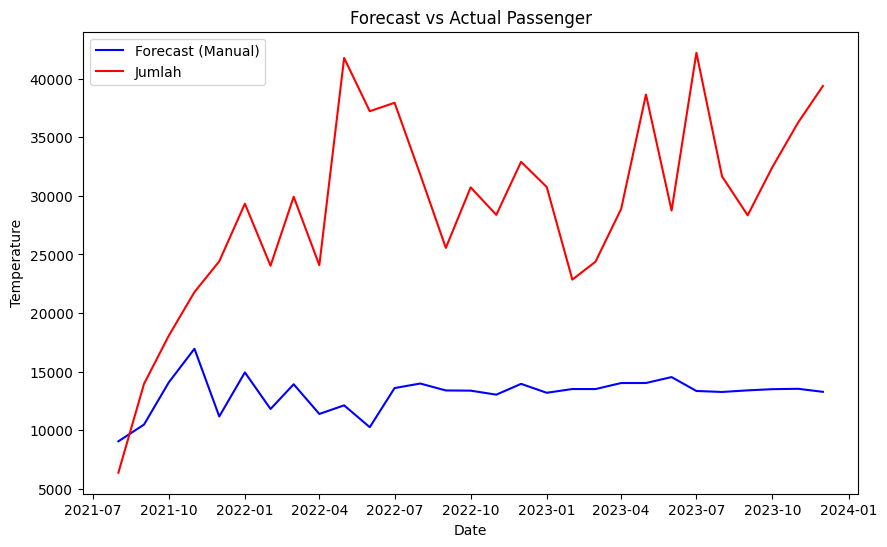

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_sarima.index, df_sarima['forecast_manual'], label='Forecast (Manual)', color='blue')
plt.plot(test_data.index, test_data['Jumlah'], label='Jumlah', color='red')
plt.title('Forecast vs Actual Passenger')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
# Calculate MAE
mae_a60 = mean_absolute_error(test_data['Jumlah'], forecast_test)
print(f'MAE_a60: {mae_a60}')

# Calculate MAPE
mape_a60 = np.mean(np.abs((test_data['Jumlah'] - forecast_test) / test_data['Jumlah'])) * 100
print(f'MAPE_a60: {mape_a60}%')

# Calculate RMSE
rmse_a60 = np.sqrt(mean_squared_error(test_data['Jumlah'], forecast_test))
print(f'RMSE_a60: {rmse_a60}')

#calculate R2
r2_a60 = r2_score(test_data['Jumlah'], forecast_test)
print(f'R-squared: {r2_a60}')

MAE_a60: 16122.015674748078
MAPE_a60: 52.56339015609461%
RMSE_a60: 17676.217593318906
R-squared: -3.9274693436224055


## 2. Prophet

In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
df_prophet = new_df.copy()

### Prophet 80% Split

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

<Axes: xlabel='date'>

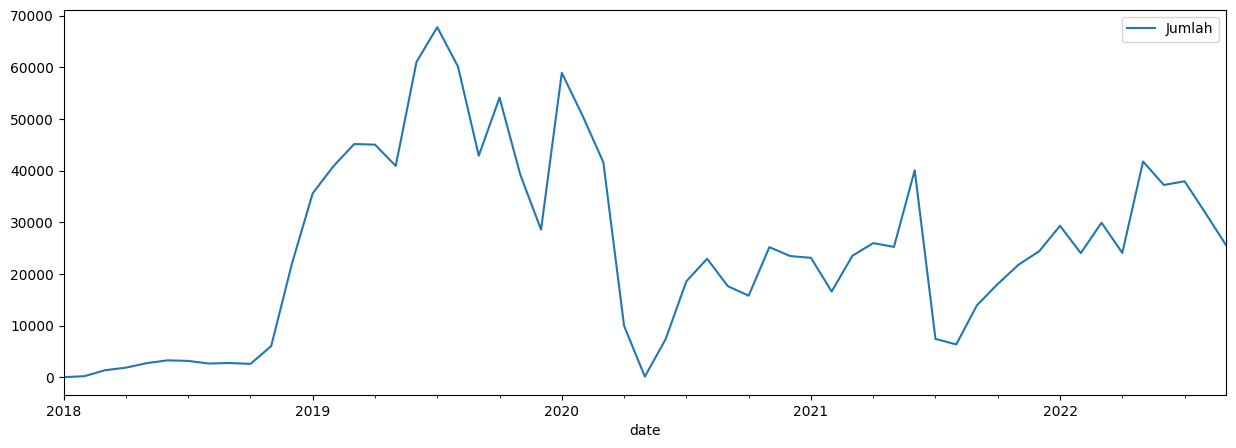

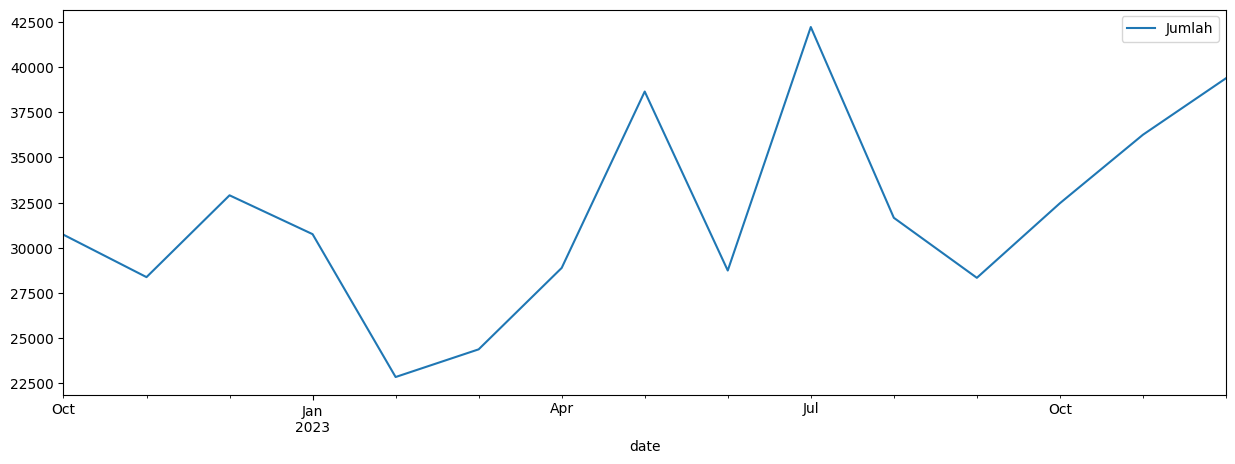

In [ ]:
train_data.plot(figsize=(15,5))
test_data.plot(figsize=(15,5))

In [ ]:
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/r8kd9t1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/xc99un96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44902', 'data', 'file=/tmp/tmpl5c2ioss/r8kd9t1a.json', 'init=/tmp/tmpl5c2ioss/xc99un96.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_model0k1cgyof/prophet_model-20241223044931.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast = prophet_model.predict(df_prophet_test)

In [ ]:
df_test_forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-10-01  37011.812296   9405.223704  49736.013644  37011.801435   
1 2022-11-01  37244.591506   7118.773848  49350.834454  37244.549695   
2 2022-12-01  37469.861709   8556.561103  49206.329100  37469.763931   
3 2023-01-01  37702.640919  20421.239503  63682.167332  37702.490781   
4 2023-02-01  37935.420129  17896.848242  60493.091655  37935.201896   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  37011.823864    -6589.548672          -6589.548672          -6589.548672   
1  37244.631888    -9223.325951          -9223.325951          -9223.325951   
2  37469.940488    -8150.816909          -8150.816909          -8150.816909   
3  37702.776141     4812.080627           4812.080627           4812.080627   
4  37935.622457      934.782170            934.782170            934.782170   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -6589.548672  -6589.548672  -6589.548672                   0.0   
1 -9223.325951  -9223.325951  -9223.325951                   0.0   
2 -8150.816909  -8150.816909  -8150.816909                   0.0   
3  4812.080627   4812.080627   4812.080627                   0.0   
4   934.782170    934.782170    934.782170                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  30422.263624  
1                         0.0                         0.0  28021.265555  
2                         0.0                         0.0  29319.044800  
3                         0.0                         0.0  42514.721546  
4                         0.0                         0.0  38870.202299

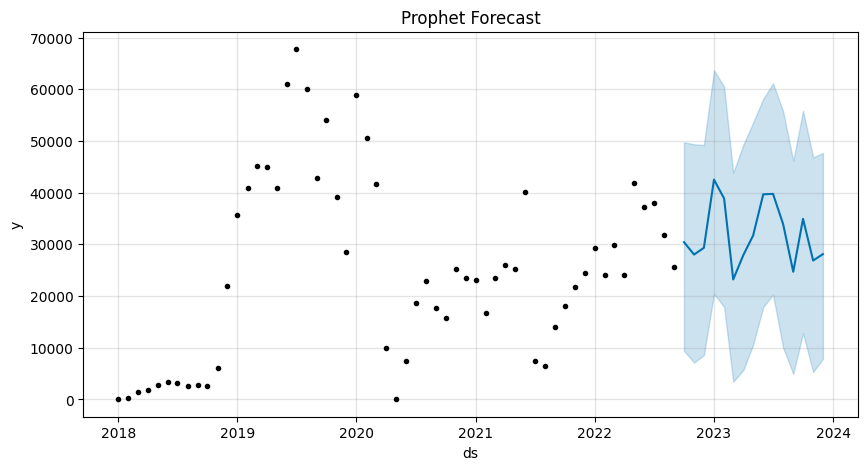

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prophet_model.plot(df_test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

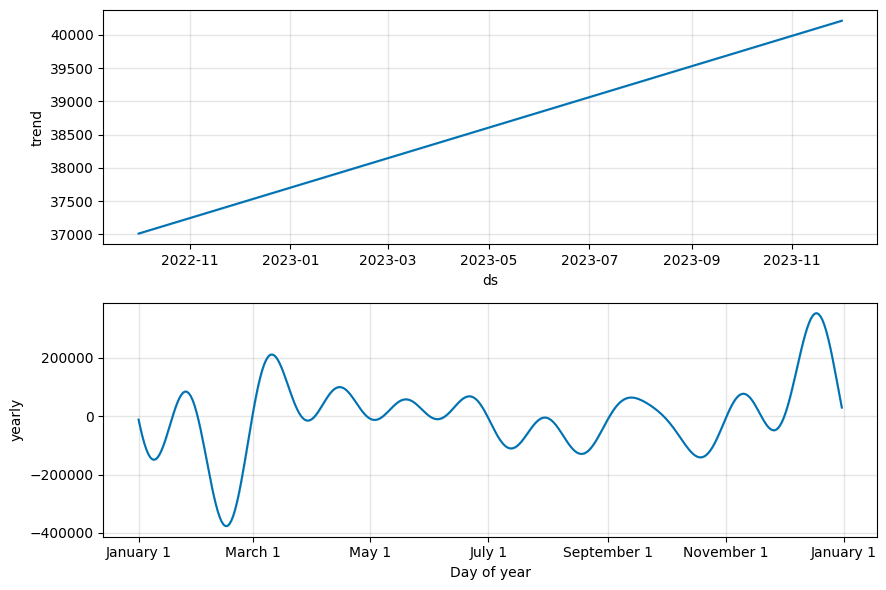

In [ ]:
fig = prophet_model.plot_components(df_test_forecast)
plt.show()

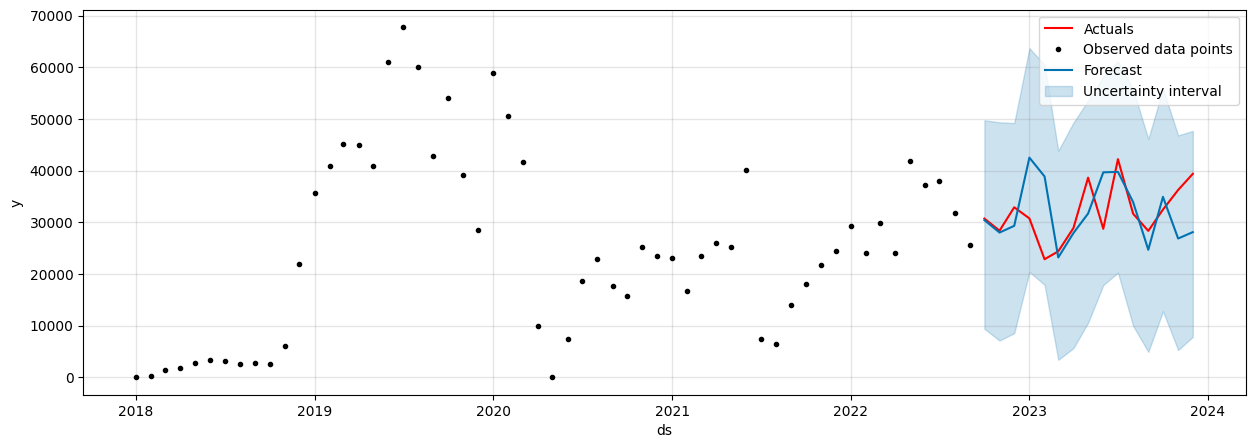

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(test_data.index, test_data['Jumlah'], color='r', label='Actuals') # Plot actuals as a line
fig = prophet_model.plot(df_test_forecast, ax=ax)
plt.legend() # Show the legend
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate MAE
mae_b80 = mean_absolute_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAE_b80: {mae_b80}')

# Calculate MAPE
mape_b80 = mean_absolute_percentage_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAPE_b80: {mape_b80}')

# Calculate RMSE
rmse_b80 = np.sqrt(mean_squared_error(test_data['Jumlah'], df_test_forecast['yhat']))
print(f'RMSE_b80: {rmse_b80}')

# Calculate R-squared
r2_b80 = r2_score(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'R-squared: {r2_b80}')

MAE_b80: 5568.379017701071
MAPE_b80: 0.18236882978342359
RMSE_b80: 7409.559988851517
R-squared: -0.9937072926046748


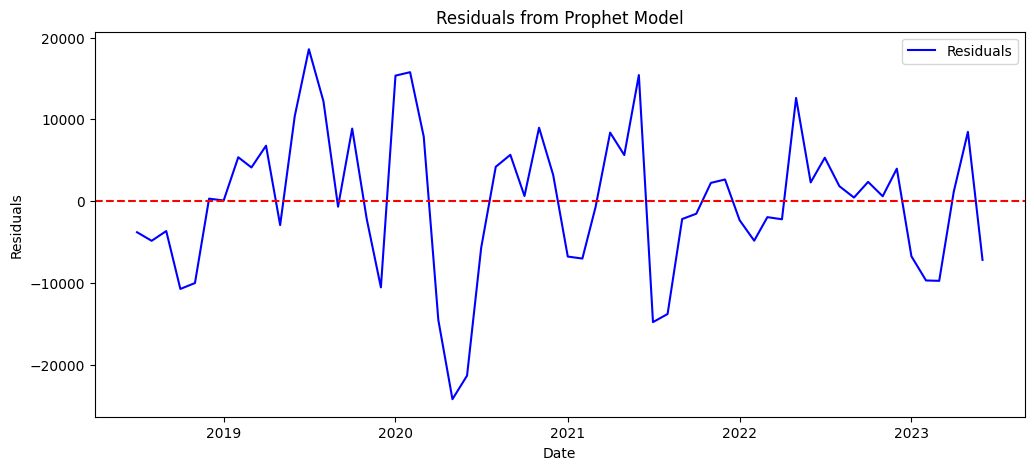

In [ ]:
# Hitung residuals
# Access the residuals using .resid attribute
residuals = result.resid

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(result.seasonal.index, residuals, label='Residuals', color='blue') # use result.seasonal or result.trend index
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals from Prophet Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### Prophet 70% Split

In [ ]:
train_size = int(len(df_prophet) * 0.7)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

<Axes: xlabel='date'>

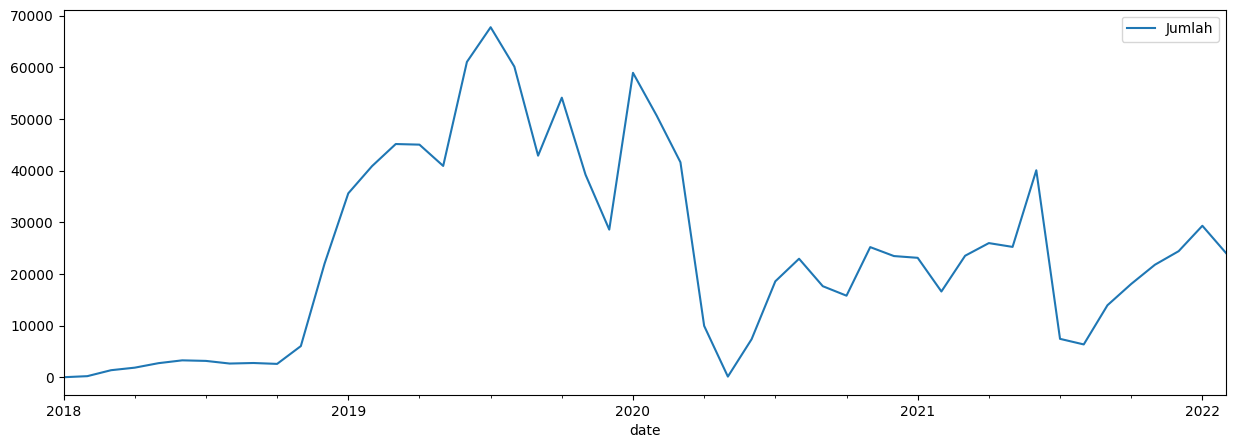

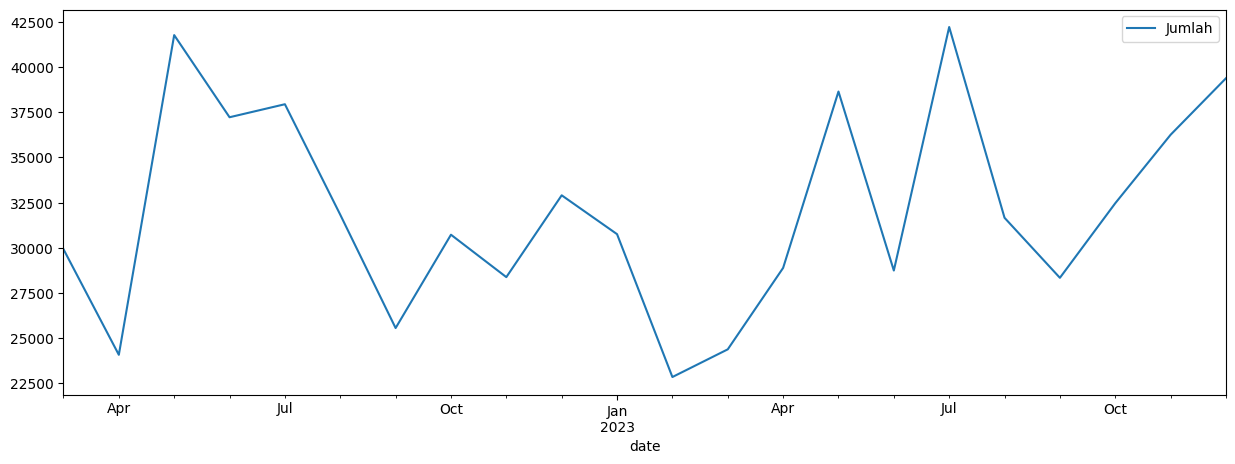

In [ ]:
train_data.plot(figsize=(15,5))
test_data.plot(figsize=(15,5))

In [ ]:
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/5xehcm97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/q8v8ec48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36024', 'data', 'file=/tmp/tmpl5c2ioss/5xehcm97.json', 'init=/tmp/tmpl5c2ioss/q8v8ec48.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_modelnqr9uajw/prophet_model-20241223044937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast = prophet_model.predict(df_prophet_test)

In [ ]:
df_test_forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-03-01  33498.645051   5988.747904  51134.116145  33498.644865   
1 2022-04-01  33668.495921   2529.518741  47363.592288  33668.495232   
2 2022-05-01  33832.867730   -101.877452  44310.023340  33832.866282   
3 2022-06-01  34002.718600  12883.234525  56211.418494  34002.716367   
4 2022-07-01  34167.090409   9839.348287  51360.047661  34167.087072   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  33498.645294    -5233.564421          -5233.564421          -5233.564421   
1  33668.496699    -8437.163579          -8437.163579          -8437.163579   
2  33832.869341   -11704.842730         -11704.842730         -11704.842730   
3  34002.721213     -410.748720           -410.748720           -410.748720   
4  34167.094104    -3352.530695          -3352.530695          -3352.530695   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -5233.564421  -5233.564421  -5233.564421                   0.0   
1  -8437.163579  -8437.163579  -8437.163579                   0.0   
2 -11704.842730 -11704.842730 -11704.842730                   0.0   
3   -410.748720   -410.748720   -410.748720                   0.0   
4  -3352.530695  -3352.530695  -3352.530695                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  28265.080630  
1                         0.0                         0.0  25231.332342  
2                         0.0                         0.0  22128.025000  
3                         0.0                         0.0  33591.969880  
4                         0.0                         0.0  30814.559714

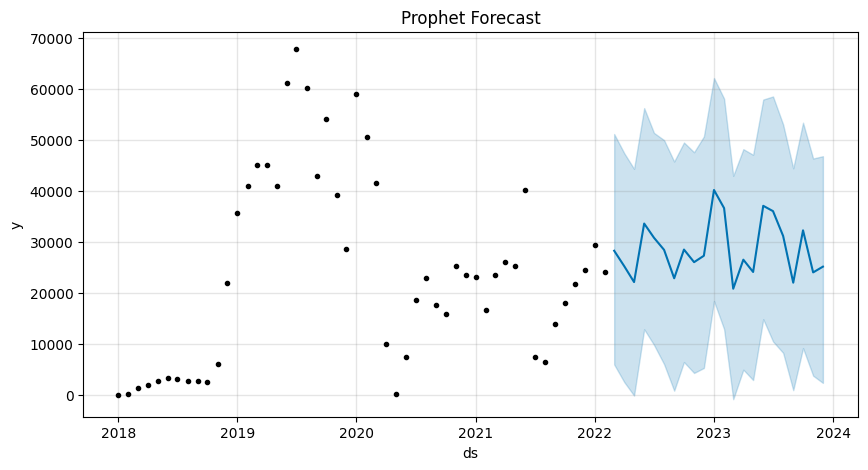

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prophet_model.plot(df_test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

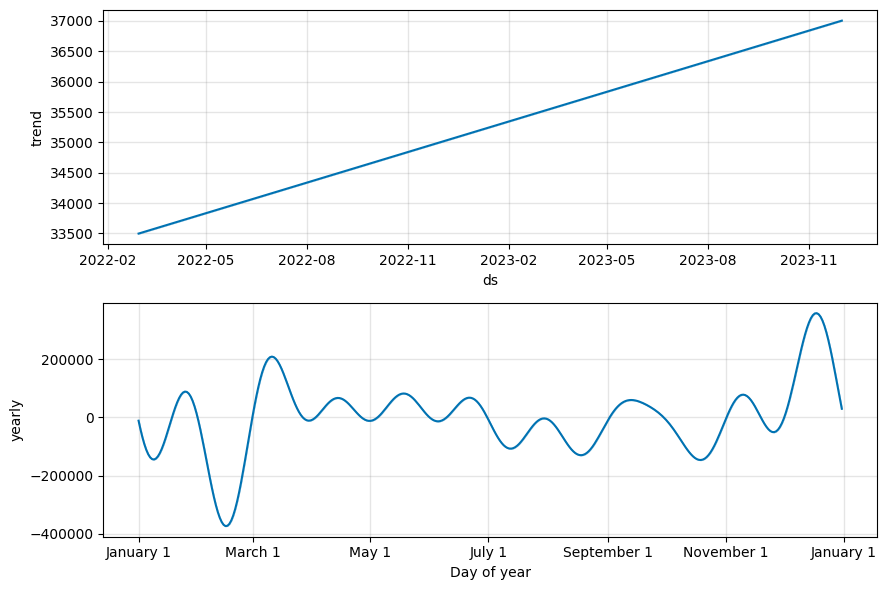

In [ ]:
fig = prophet_model.plot_components(df_test_forecast)
plt.show()

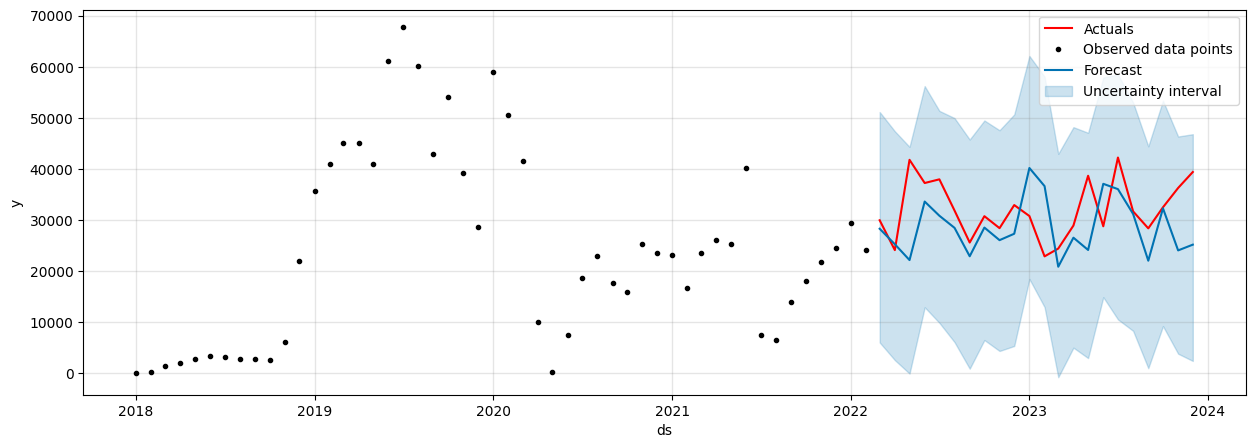

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(test_data.index, test_data['Jumlah'], color='r', label='Actuals') # Plot actuals as a line
fig = prophet_model.plot(df_test_forecast, ax=ax)
plt.legend() # Show the legend
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate MAE
mae_b70 = mean_absolute_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAE_b70: {mae_b70}')

# Calculate MAPE
mape_b70 = mean_absolute_percentage_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAPE_b70: {mape_b70}')

# Calculate RMSE
rmse_b70 = np.sqrt(mean_squared_error(test_data['Jumlah'], df_test_forecast['yhat']))
print(f'RMSE_b70: {rmse_b70}')

# Calculate R-squared
r2_b70 = r2_score(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'R-squared: {r2_b70}')

MAE_b70: 6415.81287701007
MAPE_b70: 0.19498366126298147
RMSE_b70: 8318.609251651947
R-squared: -1.2379160950740329


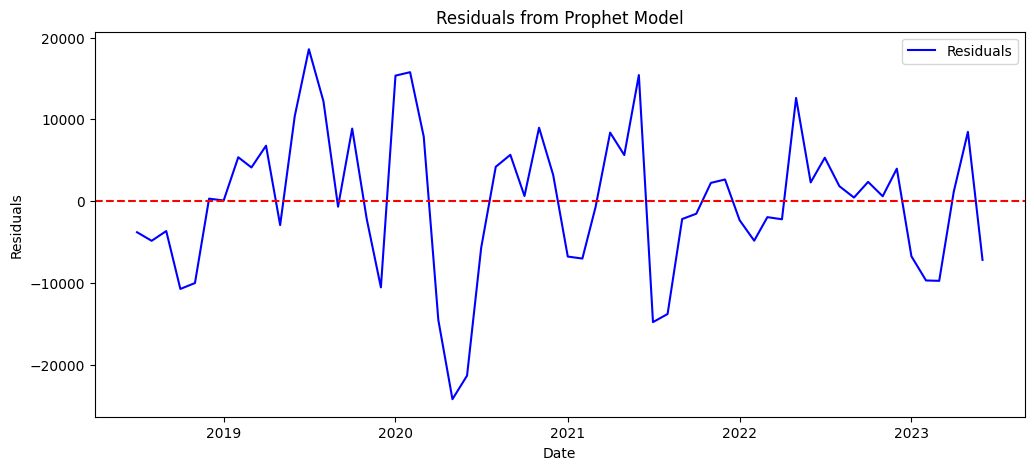

In [ ]:
# Hitung residuals
# Access the residuals using .resid attribute
residuals = result.resid

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(result.seasonal.index, residuals, label='Residuals', color='blue') # use result.seasonal or result.trend index
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals from Prophet Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

### Prophet 60% Split

In [ ]:
train_size = int(len(df_prophet) * 0.6)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

<Axes: xlabel='date'>

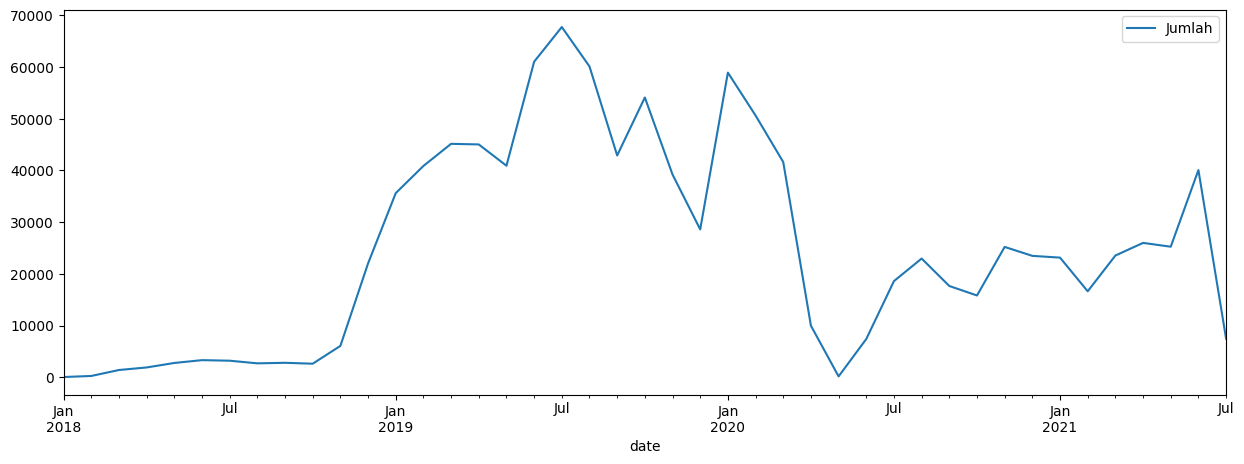

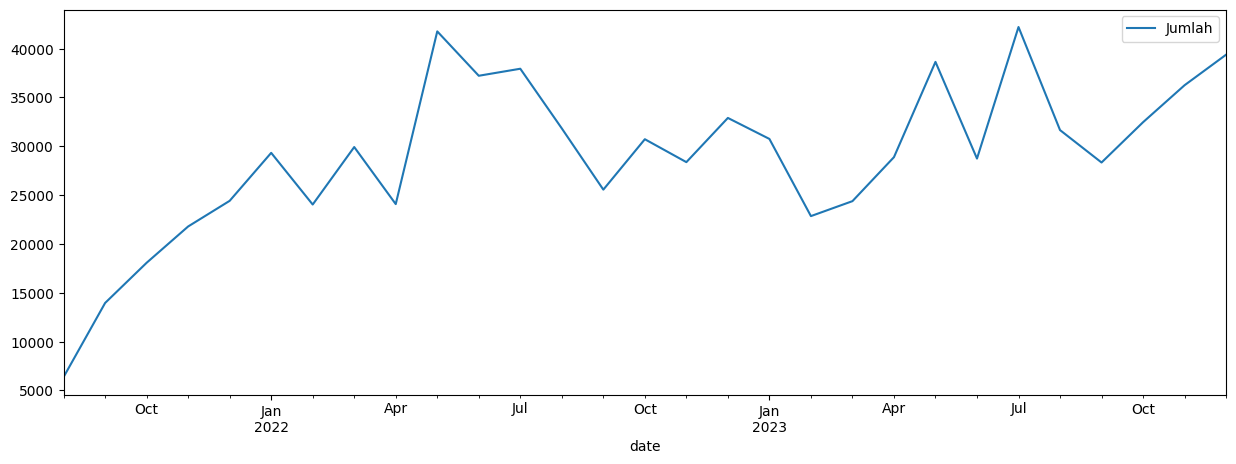

In [ ]:
train_data.plot(figsize=(15,5))
test_data.plot(figsize=(15,5))

In [ ]:
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/sjhtp5kj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/64u65jrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16241', 'data', 'file=/tmp/tmpl5c2ioss/sjhtp5kj.json', 'init=/tmp/tmpl5c2ioss/64u65jrl.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_modelicxiktkg/prophet_model-20241223044942.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast = prophet_model.predict(df_prophet_test)

In [ ]:
df_test_forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2021-08-01  37832.767327  14567.411384  62526.878294  37832.765637   
1 2021-09-01  38212.155191   8030.871811  55233.002151  38212.149817   
2 2021-10-01  38579.304736   7714.885262  54879.193058  38579.294295   
3 2021-11-01  38958.692600  11974.934633  58655.988436  38958.675697   
4 2021-12-01  39325.842145  13120.699691  58030.912875  39325.817884   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  37832.768851      443.363694            443.363694            443.363694   
1  38212.160214    -6131.739674          -6131.739674          -6131.739674   
2  38579.315217    -6964.495548          -6964.495548          -6964.495548   
3  38958.709334    -4166.873260          -4166.873260          -4166.873260   
4  39325.866301    -3173.896600          -3173.896600          -3173.896600   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   443.363694    443.363694    443.363694                   0.0   
1 -6131.739674  -6131.739674  -6131.739674                   0.0   
2 -6964.495548  -6964.495548  -6964.495548                   0.0   
3 -4166.873260  -4166.873260  -4166.873260                   0.0   
4 -3173.896600  -3173.896600  -3173.896600                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  38276.131021  
1                         0.0                         0.0  32080.415517  
2                         0.0                         0.0  31614.809188  
3                         0.0                         0.0  34791.819340  
4                         0.0                         0.0  36151.945546

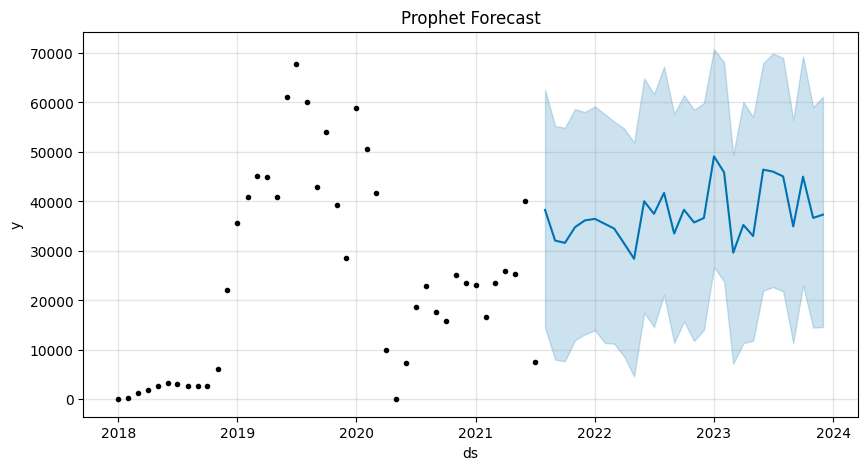

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prophet_model.plot(df_test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

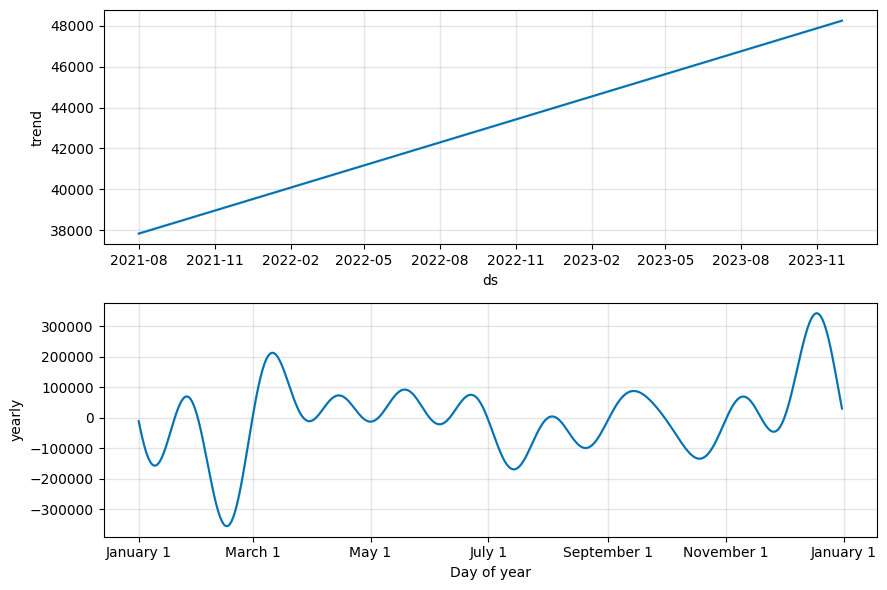

In [ ]:
fig = prophet_model.plot_components(df_test_forecast)
plt.show()

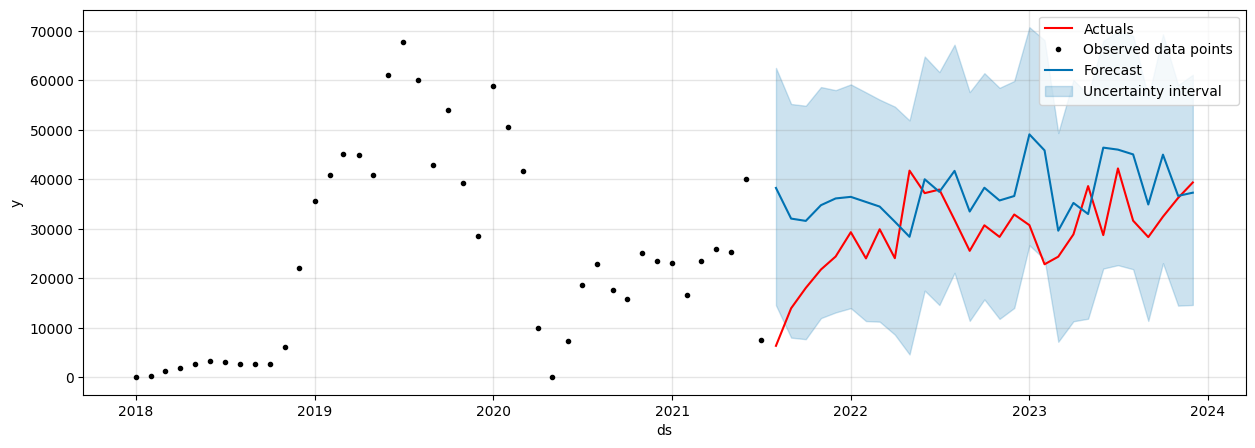

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(test_data.index, test_data['Jumlah'], color='r', label='Actuals') # Plot actuals as a line
fig = prophet_model.plot(df_test_forecast, ax=ax)
plt.legend() # Show the legend
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate MAE
mae_b60 = mean_absolute_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAE: {mae_b60}')

# Calculate MAPE
mape_b60 = mean_absolute_percentage_error(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'MAPE_b60: {mape_b60}')

# Calculate RMSE
rmse_b60 = np.sqrt(mean_squared_error(test_data['Jumlah'], df_test_forecast['yhat']))
print(f'RMSE_b60: {rmse_b60}')

# Calculate R-squared
r2_b60 = r2_score(test_data['Jumlah'], df_test_forecast['yhat'])
print(f'R-squared: {r2_b60}')

MAE: 9896.001094384203
MAPE_b60: 0.5153791861283752
RMSE_b60: 12094.171427575593
R-squared: -1.3067338739646788


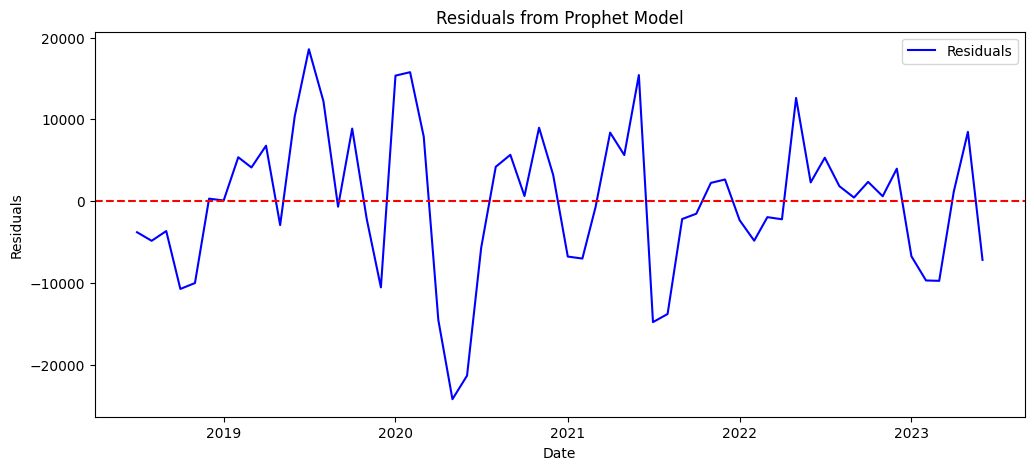

In [ ]:
# Hitung residuals
# Access the residuals using .resid attribute
residuals = result.resid

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(result.seasonal.index, residuals, label='Residuals', color='blue') # use result.seasonal or result.trend index
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals from Prophet Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Model Hybrid Prophet & GRU

### Hybrid 80% Split

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/xrh1l62n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/0u0kzcv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60935', 'data', 'file=/tmp/tmpl5c2ioss/xrh1l62n.json', 'init=/tmp/tmpl5c2ioss/0u0kzcv2.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_model4mlt6gel/prophet_model-20241223044958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/50
55/55 - 11s - 203ms/step - loss: 0.0573
Epoch 2/50
55/55 - 1s - 11ms/step - loss: 0.0341
Epoch 3/50
55/55 - 1s - 11ms/step - loss: 0.0272
Epoch 4/50
55/55 - 1s - 11ms/step - loss: 0.0238
Epoch 5/50
55/55 - 1s - 10ms/step - loss: 0.0268
Epoch 6/50
55/55 - 0s - 3ms/step - loss: 0.0251
Epoch 7/50
55/55 - 0s - 6ms/step - loss: 0.0242
Epoch 8/50
55/55 - 0s - 6ms/step - loss: 0.0253
Epoch 9/50
55/55 - 0s - 5ms/step - loss: 0.0247
Epoch 10/50
55/55 - 0s - 5ms/step - loss: 0.0234
Epoch 11/50
55/55 - 0s - 6ms/step - loss: 0.0245
Epoch 12/50
55/55 - 0s - 5ms/step - loss: 0.0261
Epoch 13/50
55/55 - 0s - 5ms/step - loss: 0.0233
Epoch 14/50
55/55 - 0s - 3ms/step - loss: 0.0232
Epoch 15/50
55/55 - 0s - 3ms/step - loss: 0.0264
Epoch 16/50
55/55 - 0s - 5ms/step - loss: 0.0230
Epoch 17/50
55/55 - 0s - 3ms/step - loss: 0.0239
Epoch 18/50
55/55 - 0s - 3ms/step - loss: 0.0279
Epoch 19/50
55/55 - 0s - 6ms/step - loss: 0.0274
Epoch 20/50
55/55 - 0s - 3ms/step - loss: 0.0249
Epoch 21/50
55/55 - 0s

<Figure size 1200x600 with 0 Axes>

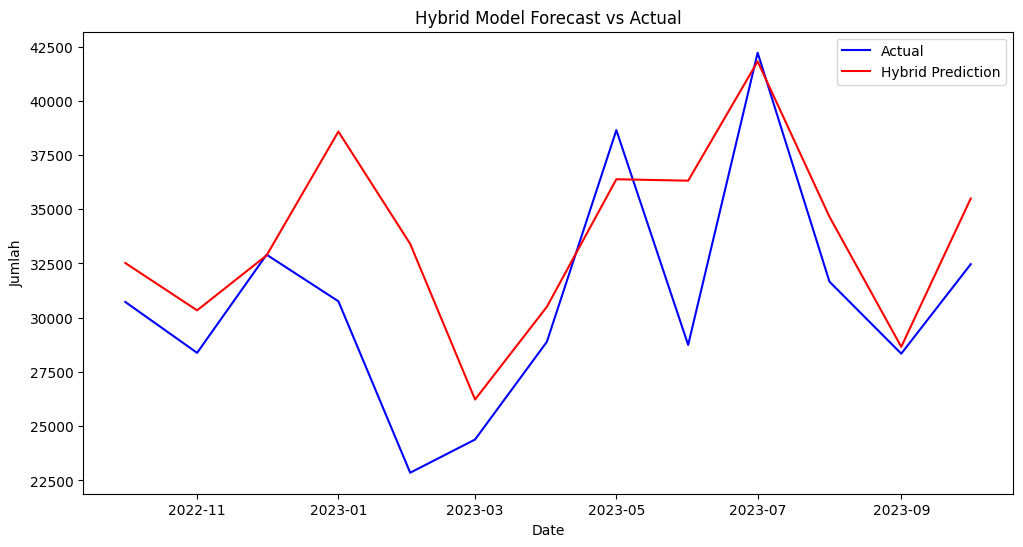

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
# Assuming 'new_df' is your DataFrame with 'Jumlah' and a DateTimeIndex
df_hybrid = new_df.copy()

# 80% train split
train_size = int(len(df_hybrid) * 0.8)
train_data = df_hybrid[:train_size]
test_data = df_hybrid[train_size:]

# Prophet Model
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast_prophet = prophet_model.predict(df_prophet_test)

# Prepare data for GRU
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Reshape data for GRU
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Combine Prophet and GRU predictions (example: averaging)
# Adjust the length of test_predict to match df_test_forecast_prophet['yhat']
# by slicing test_predict

combined_predictions = (df_test_forecast_prophet['yhat'].values[:len(test_predict)] + test_predict.flatten()) / 2


# Plotting, slice test data to match the combined predictions length
plt.figure(figsize=(12,6))
# Plot hasil
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')
# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')
plt.title('Hybrid Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

In [ ]:
# Evaluate the hybrid model, slice test data to match the combined predictions length
mae_hybrid_80 = mean_absolute_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
rmse_hybrid_80 = np.sqrt(mean_squared_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions))
mape_hybrid_80 = mean_absolute_percentage_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
r2_hybrid_80 = r2_score(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)

print(f'MAE: {mae_hybrid_80}')
print(f'RMSE: {rmse_hybrid_80}')
print(f'MAPE: {mape_hybrid_80}')
print(f'R-squared: {r2_hybrid_80}')

MAE: 6256.3020970085945
RMSE: 7818.246303267741
MAPE: 0.2092667810585283
R-squared: -0.9919160774068871


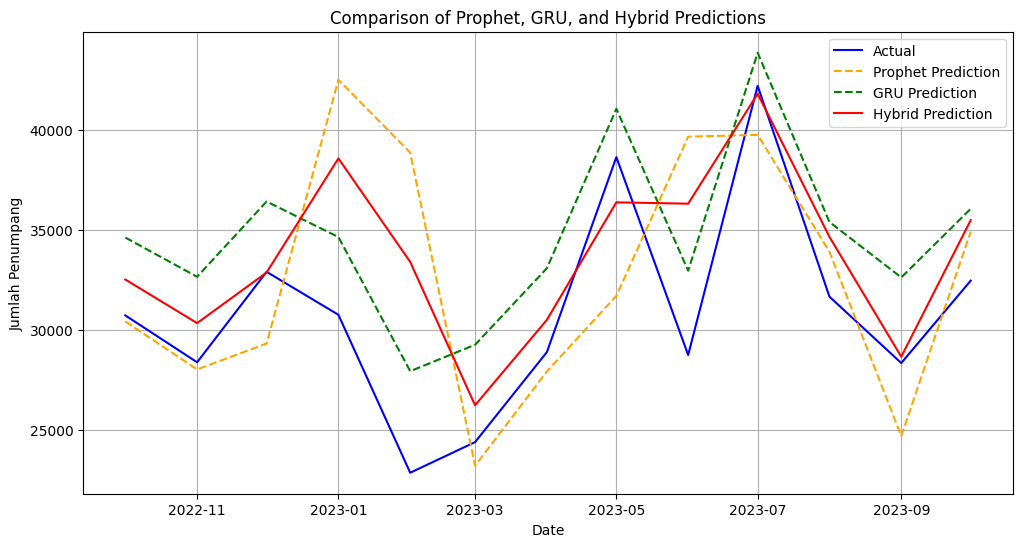

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan 'test_data', 'df_test_forecast_prophet', 'test_predict', dan 'combined_predictions' telah dihasilkan dari kode sebelumnya

# Plot hasil
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')

# Plot prediksi Prophet
plt.plot(test_data.index[:len(test_predict)], df_test_forecast_prophet['yhat'].values[:len(test_predict)],
         label='Prophet Prediction', linestyle='--', color='orange')

# Plot prediksi GRU
plt.plot(test_data.index[:len(test_predict)], test_predict.flatten(), label='GRU Prediction', linestyle='--', color='green')

# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')

# Tambahkan detail plot
plt.title('Comparison of Prophet, GRU, and Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.grid()
plt.show()


### Hybrid 70% Split

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/wlizoazb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/8qmqdba6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31910', 'data', 'file=/tmp/tmpl5c2ioss/wlizoazb.json', 'init=/tmp/tmpl5c2ioss/8qmqdba6.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_model2m37towd/prophet_model-20241223045029.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:50:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/50
48/48 - 3s - 65ms/step - loss: 0.1030
Epoch 2/50
48/48 - 0s - 3ms/step - loss: 0.0441
Epoch 3/50
48/48 - 0s - 3ms/step - loss: 0.0337
Epoch 4/50
48/48 - 0s - 3ms/step - loss: 0.0283
Epoch 5/50
48/48 - 0s - 6ms/step - loss: 0.0270
Epoch 6/50
48/48 - 0s - 4ms/step - loss: 0.0241
Epoch 7/50
48/48 - 0s - 6ms/step - loss: 0.0248
Epoch 8/50
48/48 - 0s - 6ms/step - loss: 0.0258
Epoch 9/50
48/48 - 0s - 4ms/step - loss: 0.0278
Epoch 10/50
48/48 - 0s - 8ms/step - loss: 0.0296
Epoch 11/50
48/48 - 0s - 5ms/step - loss: 0.0252
Epoch 12/50
48/48 - 0s - 6ms/step - loss: 0.0279
Epoch 13/50
48/48 - 0s - 7ms/step - loss: 0.0253
Epoch 14/50
48/48 - 0s - 7ms/step - loss: 0.0242
Epoch 15/50
48/48 - 0s - 5ms/step - loss: 0.0268
Epoch 16/50
48/48 - 0s - 7ms/step - loss: 0.0256
Epoch 17/50
48/48 - 0s - 5ms/step - loss: 0.0265
Epoch 18/50
48/48 - 0s - 6ms/step - loss: 0.0272
Epoch 19/50
48/48 - 0s - 5ms/step - loss: 0.0252
Epoch 20/50
48/48 - 0s - 6ms/step - loss: 0.0251
Epoch 21/50
48/48 - 0s - 6ms

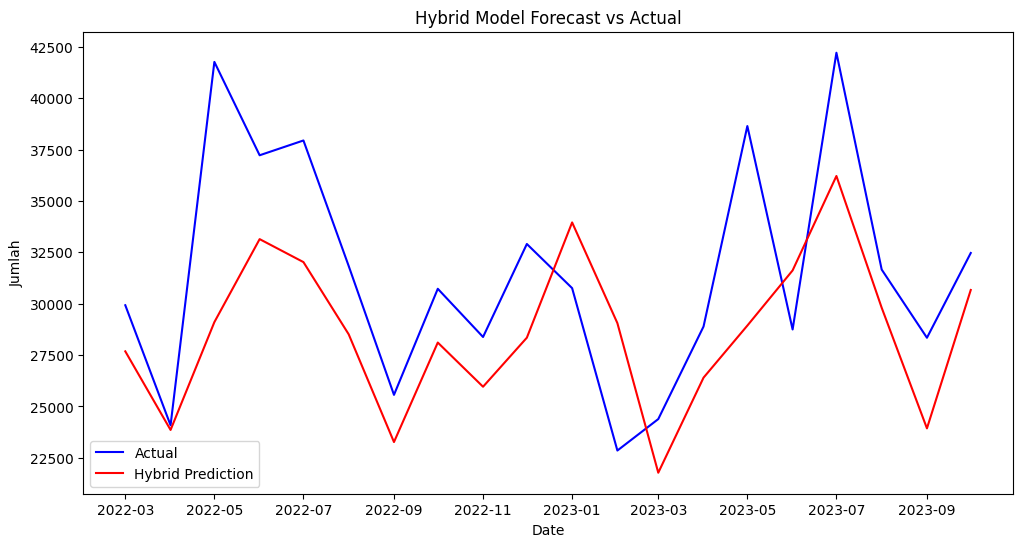

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
# Assuming 'new_df' is your DataFrame with 'Jumlah' and a DateTimeIndex
df_hybrid = new_df.copy()

# 70% train split
train_size = int(len(df_hybrid) * 0.7)
train_data = df_hybrid[:train_size]
test_data = df_hybrid[train_size:]

# Prophet Model
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast_prophet = prophet_model.predict(df_prophet_test)

# Prepare data for GRU
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Reshape data for GRU
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Combine Prophet and GRU predictions (example: averaging)
# Adjust the length of test_predict to match df_test_forecast_prophet['yhat']
# by slicing test_predict

combined_predictions = (df_test_forecast_prophet['yhat'].values[:len(test_predict)] + test_predict.flatten()) / 2


# Plotting, slice test data to match the combined predictions length
plt.figure(figsize=(12,6))

plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')
# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')
plt.title('Hybrid Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

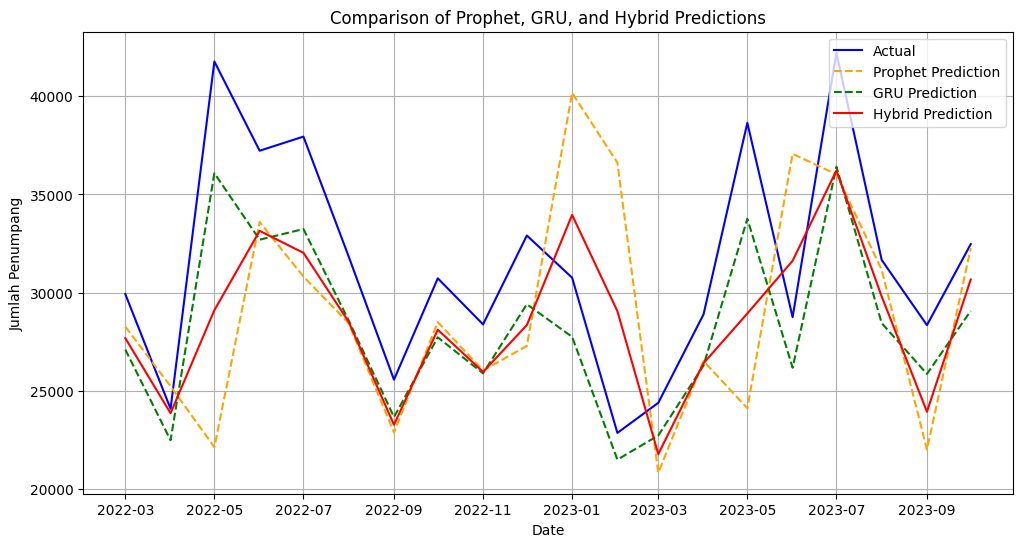

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan 'test_data', 'df_test_forecast_prophet', 'test_predict', dan 'combined_predictions' telah dihasilkan dari kode sebelumnya

# Plot hasil
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')

# Plot prediksi Prophet
plt.plot(test_data.index[:len(test_predict)], df_test_forecast_prophet['yhat'].values[:len(test_predict)],
         label='Prophet Prediction', linestyle='--', color='orange')

# Plot prediksi GRU
plt.plot(test_data.index[:len(test_predict)], test_predict.flatten(), label='GRU Prediction', linestyle='--', color='green')

# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')

# Tambahkan detail plot
plt.title('Comparison of Prophet, GRU, and Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Evaluate the hybrid model, slice test data to match the combined predictions length
mae_hybrid_70 = mean_absolute_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
rmse_hybrid_70 = np.sqrt(mean_squared_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions))
mape_hybrid_70 = mean_absolute_percentage_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
r2_hybrid_70 = r2_score(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)

print(f'MAE: {mae_hybrid_70}')
print(f'RMSE: {rmse_hybrid_70}')
print(f'MAPE: {mape_hybrid_70}')
print(f'R-squared: {r2_hybrid_70}')

MAE: 7016.729600393113
RMSE: 8547.181330350752
MAPE: 0.208550266579566
R-squared: -1.405723293019161


### Hybrid 60% Split

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/7lqf_w53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/e0leww_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99281', 'data', 'file=/tmp/tmpl5c2ioss/7lqf_w53.json', 'init=/tmp/tmpl5c2ioss/e0leww_y.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_modelgamw4qh9/prophet_model-20241223045047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:50:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/50
41/41 - 4s - 99ms/step - loss: 0.0884
Epoch 2/50
41/41 - 0s - 6ms/step - loss: 0.0395
Epoch 3/50
41/41 - 0s - 5ms/step - loss: 0.0289
Epoch 4/50
41/41 - 0s - 8ms/step - loss: 0.0274
Epoch 5/50
41/41 - 0s - 6ms/step - loss: 0.0285
Epoch 6/50
41/41 - 0s - 7ms/step - loss: 0.0256
Epoch 7/50
41/41 - 0s - 7ms/step - loss: 0.0326
Epoch 8/50
41/41 - 0s - 3ms/step - loss: 0.0273
Epoch 9/50
41/41 - 0s - 3ms/step - loss: 0.0248
Epoch 10/50
41/41 - 0s - 3ms/step - loss: 0.0250
Epoch 11/50
41/41 - 0s - 3ms/step - loss: 0.0252
Epoch 12/50
41/41 - 0s - 3ms/step - loss: 0.0228
Epoch 13/50
41/41 - 0s - 3ms/step - loss: 0.0270
Epoch 14/50
41/41 - 0s - 4ms/step - loss: 0.0268
Epoch 15/50
41/41 - 0s - 7ms/step - loss: 0.0237
Epoch 16/50
41/41 - 0s - 3ms/step - loss: 0.0255
Epoch 17/50
41/41 - 0s - 4ms/step - loss: 0.0231
Epoch 18/50
41/41 - 0s - 7ms/step - loss: 0.0245
Epoch 19/50
41/41 - 0s - 3ms/step - loss: 0.0241
Epoch 20/50
41/41 - 0s - 3ms/step - loss: 0.0245
Epoch 21/50
41/41 - 0s - 3ms

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


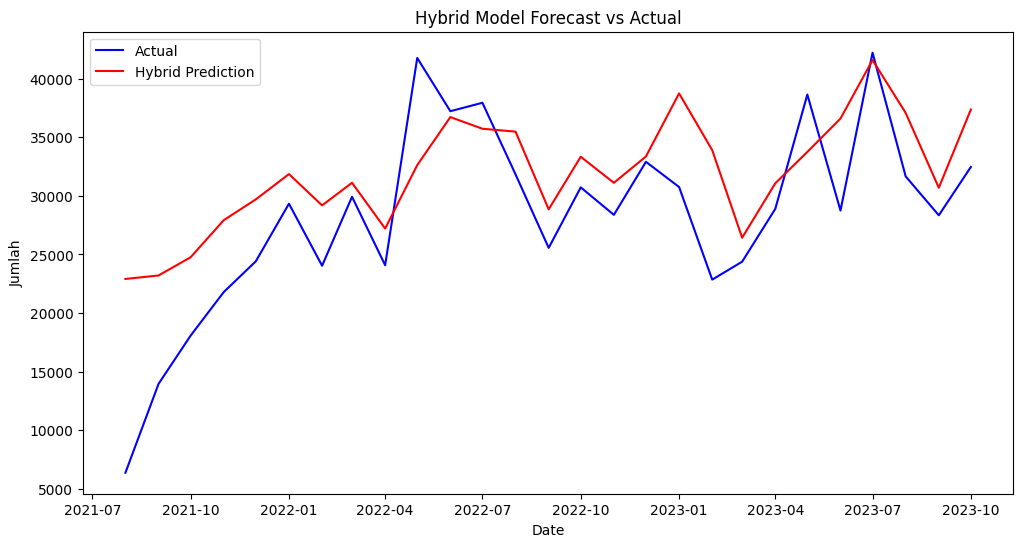

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
# Assuming 'new_df' is your DataFrame with 'Jumlah' and a DateTimeIndex
df_hybrid = new_df.copy()

# 60% train split
train_size = int(len(df_hybrid) * 0.6)
train_data = df_hybrid[:train_size]
test_data = df_hybrid[train_size:]

# Prophet Model
df_prophet_train = train_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet_train)
df_prophet_test = test_data.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
df_test_forecast_prophet = prophet_model.predict(df_prophet_test)

# Prepare data for GRU
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Reshape data for GRU
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Combine Prophet and GRU predictions (example: averaging)
# Adjust the length of test_predict to match df_test_forecast_prophet['yhat']
# by slicing test_predict

combined_predictions = (df_test_forecast_prophet['yhat'].values[:len(test_predict)] + test_predict.flatten()) / 2


# Plotting, slice test data to match the combined predictions length
# Plotting, slice test data to match the combined predictions length
plt.figure(figsize=(12,6))

plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')
# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')
plt.title('Hybrid Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

In [ ]:
# Evaluate the hybrid model, slice test data to match the combined predictions length
mae_hybrid_60 = mean_absolute_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
rmse_hybrid_60 = np.sqrt(mean_squared_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions))
mape_hybrid_60 = mean_absolute_percentage_error(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)
r2_hybrid_60 = r2_score(test_data['Jumlah'][look_back+1:look_back+1+len(combined_predictions)], combined_predictions)

print(f'MAE: {mae_hybrid_60}')
print(f'RMSE: {rmse_hybrid_60}')
print(f'MAPE: {mape_hybrid_60}')
print(f'R-squared: {r2_hybrid_60}')

MAE: 5593.23360379858
RMSE: 6954.791783489526
MAPE: 0.18918173064738006
R-squared: -0.25224212957638215


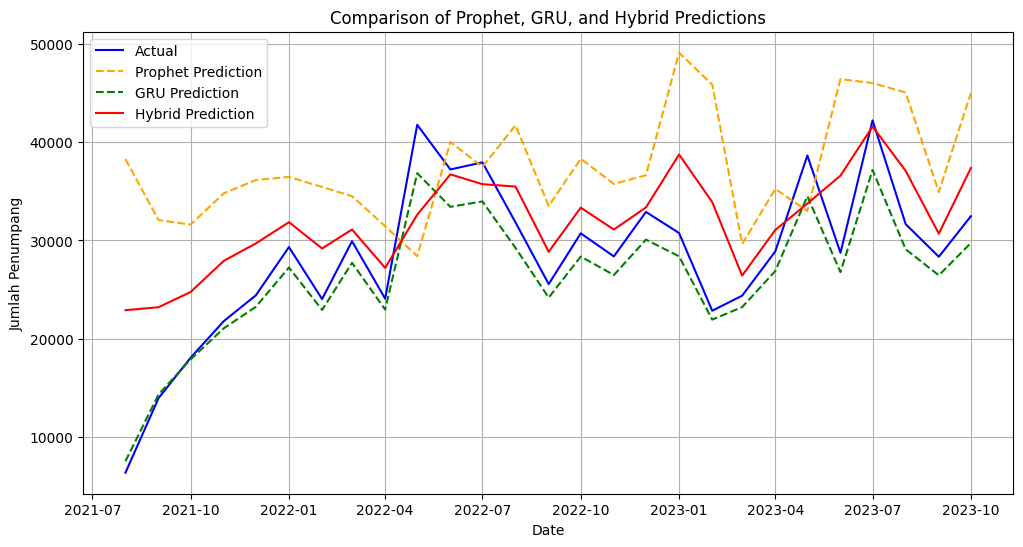

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan 'test_data', 'df_test_forecast_prophet', 'test_predict', dan 'combined_predictions' telah dihasilkan dari kode sebelumnya

# Plot hasil
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(test_data.index[:len(test_predict)], test_data['Jumlah'].iloc[:len(test_predict)], label='Actual', color='blue')

# Plot prediksi Prophet
plt.plot(test_data.index[:len(test_predict)], df_test_forecast_prophet['yhat'].values[:len(test_predict)],
         label='Prophet Prediction', linestyle='--', color='orange')

# Plot prediksi GRU
plt.plot(test_data.index[:len(test_predict)], test_predict.flatten(), label='GRU Prediction', linestyle='--', color='green')

# Plot prediksi hybrid (Prophet + GRU)
plt.plot(test_data.index[:len(test_predict)], combined_predictions, label='Hybrid Prediction', color='red')

# Tambahkan detail plot
plt.title('Comparison of Prophet, GRU, and Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.grid()
plt.show()


# Rekapitulasi Evaluasi

In [ ]:
# prompt: Buat tabel rekapitulasi hasil forecasting dan analisis.

import pandas as pd

data = {
    'Model': ['SARIMA (80% split)', 'SARIMA (70% split)','SARIMA (60% split)', 'Prophet (80% split)', 'Prophet (70% split)', 'Prophet (60% split)', 'Hybrid (80% split)', 'Hybrid (70% split)', 'Hybrid (60% split)'],
    'MAE': [mae_a80, mae_a70, mae_a60, mae_b80, mae_b70, mae_b60, mae_hybrid_80, mae_hybrid_70, mae_hybrid_60],
    'MAPE': [mape_a80, mape_a70, mape_a60, mape_b80, mape_b70, mape_b60, mape_hybrid_80, mape_hybrid_70, mape_hybrid_60],
    'RMSE': [rmse_a80, rmse_a70, rmse_a60, rmse_b80, rmse_b70, rmse_b60, rmse_hybrid_80, rmse_hybrid_70, rmse_hybrid_60],
    'R-squared': [r2_a80, r2_a70, r2_a60, r2_b80, r2_b70, r2_b60, r2_hybrid_80, r2_hybrid_70, r2_hybrid_60]
}

df_rekap = pd.DataFrame(data)
df_rekap

Model           MAE       MAPE          RMSE  R-squared
0   SARIMA (80% split)   4399.793534  13.373395   5821.674300  -0.230757
1   SARIMA (70% split)   8306.106865  23.770655   9935.086297  -2.192167
2   SARIMA (60% split)  16122.015675  52.563390  17676.217593  -3.927469
3  Prophet (80% split)   5568.379018   0.182369   7409.559989  -0.993707
4  Prophet (70% split)   6415.812877   0.194984   8318.609252  -1.237916
5  Prophet (60% split)   9896.001094   0.515379  12094.171428  -1.306734
6   Hybrid (80% split)   6256.302097   0.209267   7818.246303  -0.991916
7   Hybrid (70% split)   7016.729600   0.208550   8547.181330  -1.405723
8   Hybrid (60% split)   5593.233604   0.189182   6954.791783  -0.252242

# Implementasi forecast 1 tahun ke depan

## Model SARIMA




In [ ]:
df_sarima_imp = new_df.copy()
df_sarima_imp.head()

Jumlah
date              
2018-01-01      33
2018-02-01     238
2018-03-01    1391
2018-04-01    1883
2018-05-01    2752

In [ ]:
adfuller_test(df_sarima_imp['Jumlah'])

ADF Test Statistic : -2.876803041478861
p-value : 0.04811274974114498
#Lags Used : 0
Number of Observations Used : 71
Critical Values : {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definisikan parameter musiman
seasonal_order = (1, 0, 1, 12)

# Buat model SARIMA
sarima_model = SARIMAX(df_sarima_imp,
                       order=(4, 1, 1),
                       seasonal_order=seasonal_order)

# Fit model SARIMA
sarima_model_fit = sarima_model.fit()

# Tampilkan ringkasan hasil model
print(sarima_model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Jumlah   No. Observations:                   72
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -750.648
Date:                            Mon, 23 Dec 2024   AIC                           1517.296
Time:                                    04:51:04   BIC                           1535.398
Sample:                                01-01-2018   HQIC                          1524.494
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9399      0.295     -3.184      0.001      -1.518      -0.361
ar.L2         -0.2481      0.175   

In [ ]:
forecast_steps = 12  # Forecasting untuk 1 tahun ke depan (12 bulan)
forecast_future = sarima_model_fit.get_forecast(steps=forecast_steps)

forecast_future_dates = pd.date_range(start=df_sarima_imp.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_future_df =pd.DataFrame({
    'Date': forecast_future_dates,
    'Forecast': forecast_future.predicted_mean
})
forecast_future_df.set_index('Date', inplace=True)

# Gabungkan data historis dengan forecast
full_data_with_forecast = pd.concat([df_sarima_imp, forecast_future_df])


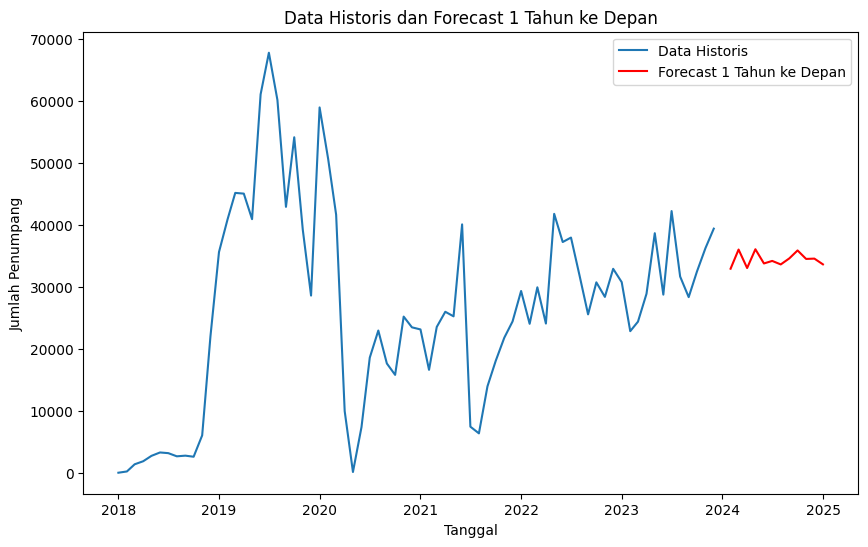

In [ ]:
plt.figure(figsize=(10, 6))
# Assuming 'Jumlah' is the correct column name for passenger count
plt.plot(df_sarima_imp.index, df_sarima_imp['Jumlah'], label='Data Historis')
plt.plot(forecast_future_df.index, forecast_future_df['Forecast'], label='Forecast 1 Tahun ke Depan', color='red')
plt.title('Data Historis dan Forecast 1 Tahun ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

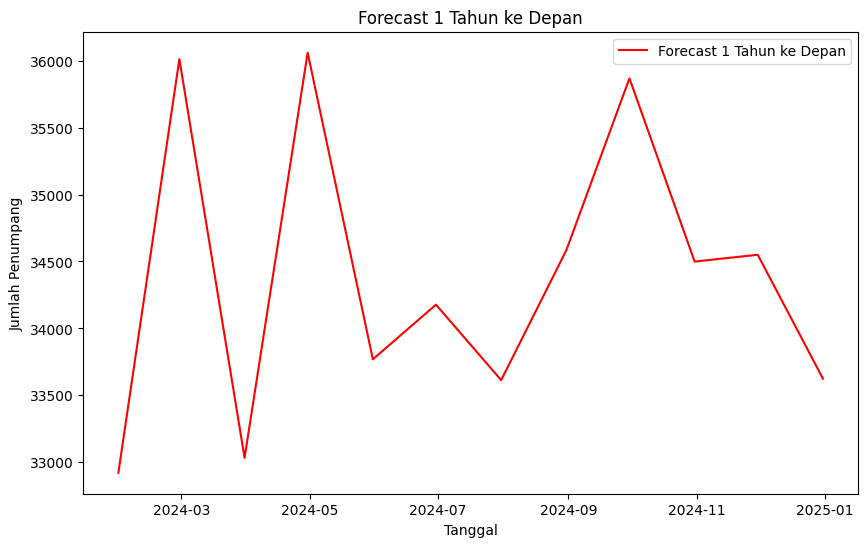

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_future_df.index, forecast_future_df['Forecast'], label='Forecast 1 Tahun ke Depan', color='red')
plt.title('Forecast 1 Tahun ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

## Model Prophet

In [ ]:
df_prophet = new_df.copy()

In [ ]:
df_prophet_imp = df_prophet.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/b8cyrsl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/qaavk78z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9967', 'data', 'file=/tmp/tmpl5c2ioss/b8cyrsl_.json', 'init=/tmp/tmpl5c2ioss/qaavk78z.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_modelyea621vt/prophet_model-20241223045105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


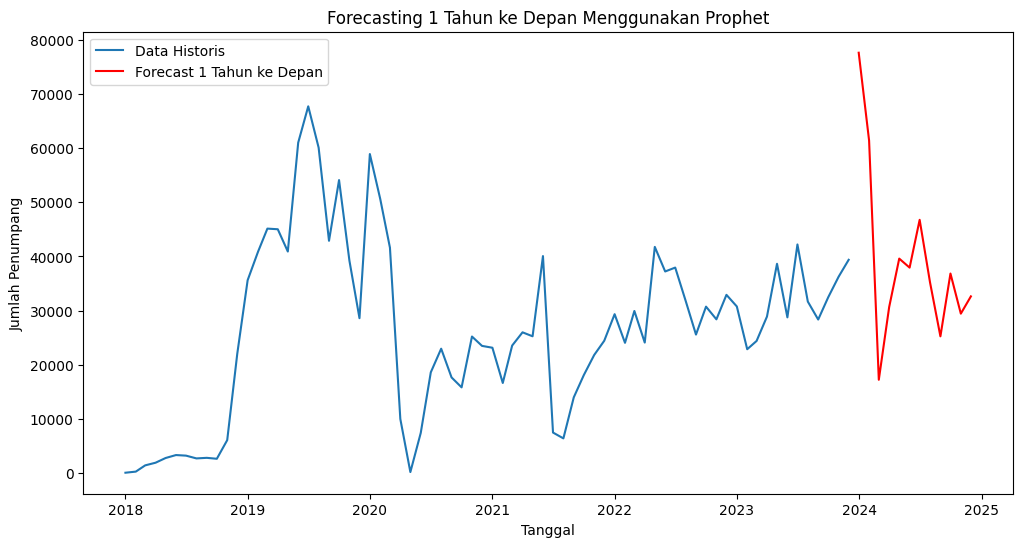

In [ ]:
# Forecasting untuk 12 bulan ke depan
forecast_steps = 12  # 12 bulan

prophet_model = Prophet()
prophet_model.fit(df_prophet_imp)
# Membuat future dataframe
future = prophet_model.make_future_dataframe(periods=forecast_steps, freq='M')

# Melakukan prediksi
future_forecast = prophet_model.predict(future)

# Memisahkan hasil prediksi 1 tahun ke depan
forecast_future_df = future_forecast[['ds', 'yhat']][-forecast_steps:].rename(columns={'ds': 'Date', 'yhat': 'Forecast'})
forecast_future_df.set_index('Date', inplace=True)

# Gabungkan data historis dan prediksi
full_forecast_df = future_forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Forecast'})
full_forecast_df.set_index('Date', inplace=True)

# Visualisasi data historis dan prediksi 1 tahun ke depan
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['Jumlah'], label='Data Historis')  # Data historis
plt.plot(forecast_future_df.index, forecast_future_df['Forecast'], label='Forecast 1 Tahun ke Depan', color='red')  # Forecast
plt.title('Forecasting 1 Tahun ke Depan Menggunakan Prophet')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()


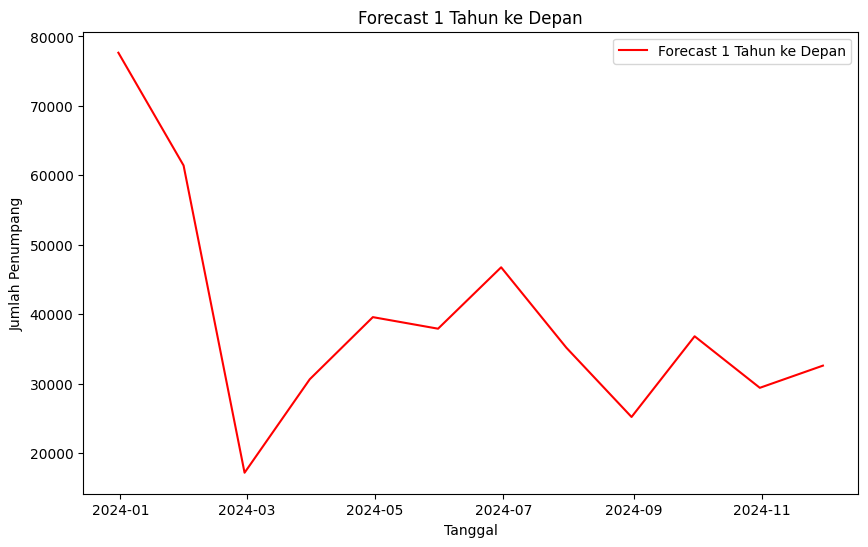

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_future_df.index, forecast_future_df['Forecast'], label='Forecast 1 Tahun ke Depan', color='red')
plt.title('Forecast 1 Tahun ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

## Model Hybrid

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/45brajo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5c2ioss/jk4ubxli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45864', 'data', 'file=/tmp/tmpl5c2ioss/45brajo6.json', 'init=/tmp/tmpl5c2ioss/jk4ubxli.json', 'output', 'file=/tmp/tmpl5c2ioss/prophet_modelgm9zzcxe/prophet_model-20241223045107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:51:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/50
60/60 - 3s - 56ms/step - loss: 0.0647
Epoch 2/50
60/60 - 0s - 3ms/step - loss: 0.0312
Epoch 3/50
60/60 - 0s - 3ms/step - loss: 0.0253
Epoch 4/50
60/60 - 0s - 3ms/step - loss: 0.0259
Epoch 5/50
60/60 - 0s - 3ms/step - loss: 0.0197
Epoch 6/50
60/60 - 0s - 5ms/step - loss: 0.0189
Epoch 7/50
60/60 - 0s - 4ms/step - loss: 0.0221
Epoch 8/50
60/60 - 0s - 3ms/step - loss: 0.0198
Epoch 9/50
60/60 - 0s - 5ms/step - loss: 0.0187
Epoch 10/50
60/60 - 0s - 5ms/step - loss: 0.0183
Epoch 11/50
60/60 - 0s - 3ms/step - loss: 0.0187
Epoch 12/50
60/60 - 0s - 3ms/step - loss: 0.0186
Epoch 13/50
60/60 - 0s - 3ms/step - loss: 0.0198
Epoch 14/50
60/60 - 0s - 3ms/step - loss: 0.0203
Epoch 15/50
60/60 - 0s - 3ms/step - loss: 0.0160
Epoch 16/50
60/60 - 0s - 4ms/step - loss: 0.0208
Epoch 17/50
60/60 - 0s - 3ms/step - loss: 0.0199
Epoch 18/50
60/60 - 0s - 3ms/step - loss: 0.0170
Epoch 19/50
60/60 - 0s - 5ms/step - loss: 0.0188
Epoch 20/50
60/60 - 0s - 3ms/step - loss: 0.0179
Epoch 21/50
60/60 - 0s - 3ms

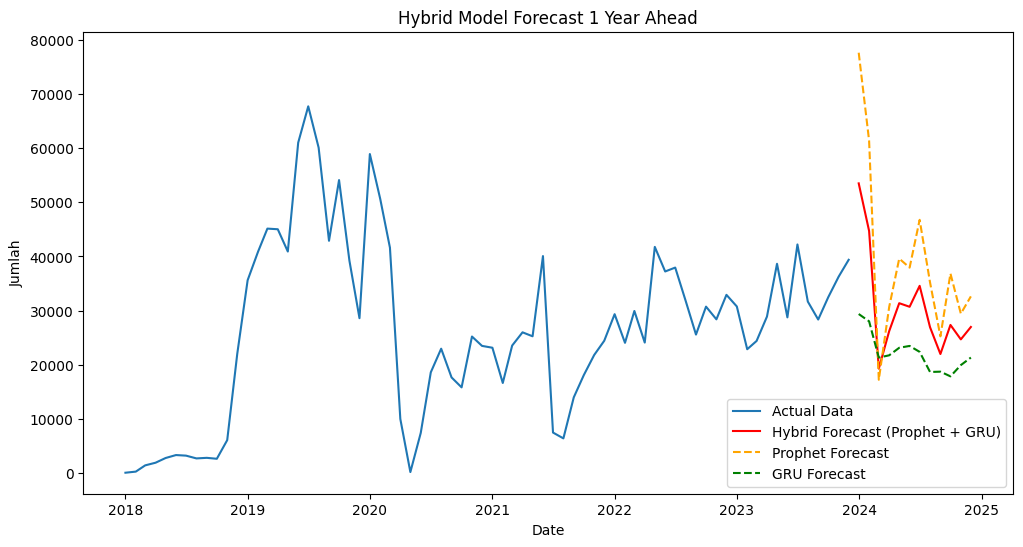

In [ ]:
# Copy the dataframe and ensure 'date' is in datetime format
df_hybrid = new_df.copy()

# Prophet Model (fit to entire dataframe)
df_prophet = df_hybrid.reset_index().rename(columns={'date': 'ds', 'Jumlah': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Forecast 1 year ahead with Prophet
forecast_steps = 12  # 12 months
future = prophet_model.make_future_dataframe(periods=forecast_steps, freq='M')
forecast_prophet = prophet_model.predict(future)

# Prepare data for GRU
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_hybrid[['Jumlah']])

# Create dataset for GRU
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12  # Use 12 months of past data for predictions
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Train GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=50, batch_size=1, verbose=2)

# Forecast using GRU
last_look_back = scaled_data[-look_back:]  # Last 12 months from the original data
X_input = np.reshape(last_look_back, (1, 1, look_back))  # Reshape to match input shape
gru_forecast = []
for _ in range(forecast_steps):
    prediction = model.predict(X_input)[0, 0]
    gru_forecast.append(prediction)
    # Update the input with the new prediction
    last_look_back = np.append(last_look_back[1:], [[prediction]], axis=0)
    X_input = np.reshape(last_look_back, (1, 1, look_back))

# Invert GRU forecast to original scale
gru_forecast = scaler.inverse_transform(np.array(gru_forecast).reshape(-1, 1)).flatten()

# Combine Prophet and GRU predictions
prophet_forecast = forecast_prophet[['ds', 'yhat']].iloc[-forecast_steps:]
prophet_forecast['GRU'] = gru_forecast
prophet_forecast['Hybrid'] = (prophet_forecast['yhat'] + prophet_forecast['GRU']) / 2

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_hybrid.index, df_hybrid['Jumlah'], label='Actual Data')
plt.plot(prophet_forecast['ds'], prophet_forecast['Hybrid'], label='Hybrid Forecast (Prophet + GRU)', color='red')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', linestyle='--', color='orange')
plt.plot(prophet_forecast['ds'], prophet_forecast['GRU'], label='GRU Forecast', linestyle='--', color='green')
plt.title('Hybrid Model Forecast 1 Year Ahead')
plt.xlabel('Date')
plt.ylabel('Jumlah')
plt.legend()
plt.show()